# Exercises

In [1]:
options(repr.plot.width = 12, repr.plot.height = 9)
library(igraph)
igraph_options(vertex.color = "aquamarine3", vertex.frame.color = "white", vertex.frame.size = .8)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## 1. Create an igraph network from an adjacency matrix and an edgelist.

The Drosophila's Connectome [Shih, Sporns et al. 2015](https://doi.org/10.1016/j.cub.2015.03.021)

In the supplementary material you can find a [spreadsheet](https://ars.els-cdn.com/content/image/1-s2.0-S096098221500336X-mmc2.xlsx) with the connectivity matrix (sheet 2), i.e.the weighted adjacency matrix of the Drosophila's connectome.

0. The xlsx file has already been saved in the data folder.
1. Read the second sheet of the xlsx file.
2. From the matrix (or data.frame) build a weighted directed network using `igraph`.
3. Plot the network with and without node names, try customising it.

All you need can be found in `igraph`'s [documentaion](http://igraph.org/r/doc/).

Let's start with data import: since the excel has several sheets we cannot use the function `read.csv()`. There are different packages for manipulation of xlsx files, here I use `readxl` since we just need to _read_ a file and it is included in `tidyverse`. Still, we have to load it explicitly because it is not a tidyverse core package.

In [2]:
library(tidyverse)
library(readxl)
theme_set(new = theme_light())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()


In [3]:
adj <- read_excel("data/dros.xlsx", sheet = 2) %>% column_to_rownames(var = "..1")

New names:
* `` -> `..1`


In [4]:
adj %>% head

AL       AMMC      CCP       CMP        CVLP      DLP       DMP      
AL    0.00000  23.31957  63.42209   1.000000 115.97143  97.92639  278.0735
AMMC 35.02518   0.00000  96.47922 149.282718 964.54705  65.53807  237.0348
CCP  15.15587  98.71595   0.00000  99.046269 334.17676  56.40859  842.8646
CMP  10.41421  73.93845  64.91628   0.000000 253.52284  39.41425  281.9447
CVLP 50.83450 268.67187 350.10114 314.757086   0.00000 150.59538 1250.9912
DLP  41.92665  22.02185 132.28065   5.414214  28.26119   0.00000  203.0849
     EB        FB        IDFP      ⋯ nod       og        optu      pan      
AL   21.694313  51.09132 199.31605 ⋯ 10.812571  0.000000  9.609154 12.487180
AMMC  4.690416  15.22381  27.20972 ⋯  0.000000 11.047134  0.000000  4.358899
CCP  30.673551 151.78423 192.81755 ⋯ 28.196825  6.236068 35.467683  7.222243
CMP  10.656854  21.23884  97.89513 ⋯  3.732051  0.000000  0.000000  2.000000
CVLP 59.624019 172.81004 459.03899 ⋯ 27.427107  6.610366  8.062258  2.000000
DLP  24.633915 166.23603  66.66107 ⋯  4.645751  7.071068 40.334537  4.732051
     sdfp      sog       spp       vlp-d      vlp-v     vmp      
AL   127.34522  31.18847  66.68565   4.828427  0.000000  34.46182
AMMC  10.71268 110.83406  22.66023 223.352134 60.972085 236.84931
CCP  116.09012  75.56259 105.26903 281.746068 25.653730 586.81541
CMP    1.00000  71.41455  13.45946  28.006255  3.464102 176.66791
CVLP  19.17349 121.15555  74.51500 349.532434 54.982578 763.69853
DLP  475.03853 125.62108  97.67286 112.667469 18.708287  57.24391

In [5]:
gdros <- graph_from_adjacency_matrix(adjmatrix = as.matrix(adj), weighted = T)

In [6]:
gdros

IGRAPH 3f8881e DNW- 49 1950 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 3f8881e (vertex names):
 [1] AL  ->AMMC  AL  ->CCP   AL  ->CMP   AL  ->CVLP  AL  ->DLP   AL  ->DMP  
 [7] AL  ->EB    AL  ->FB    AL  ->IDFP  AL  ->LH    AL  ->MB    AL  ->NOD  
[13] AL  ->OPTU  AL  ->PAN   AL  ->PCB   AL  ->SDFP  AL  ->SOG   AL  ->SPP  
[19] AL  ->VLP-D AL  ->VLP-V AL  ->VMP   AL  ->al    AL  ->ccp   AL  ->cvlp 
[25] AL  ->dlp   AL  ->dmp   AL  ->idfp  AL  ->lh    AL  ->mb    AL  ->nod  
[31] AL  ->optu  AL  ->pan   AL  ->sdfp  AL  ->sog   AL  ->spp   AL  ->vlp-d
[37] AL  ->vmp   AMMC->AL    AMMC->CCP   AMMC->CMP   AMMC->CVLP  AMMC->DLP  
[43] AMMC->DMP   AMMC->EB    AMMC->FB    AMMC->IDFP  AMMC->LH    AMMC->LOB  
+ ... omitted several edges

**To-Do: Make the plot nicer!** Look at [`igraph.plotting`](https://igraph.org/r/doc/plot.common.html).

#### 1.2 Save the network as an edge list, then read it and re-build the network.

**Hint:** use `write_graph(graph, file, format = "edgelist", ...)` and `read_graph(file, format = "edgelist")`.

**Problem:** how to write edge weights? Find a workaround!

Other useful functions:
* `as_edgelist(graph, names = TRUE)`
* `graph_from_edgelist(el, directed = TRUE)`
* see [igraph/r/doc](https://igraph.org/r/doc/)

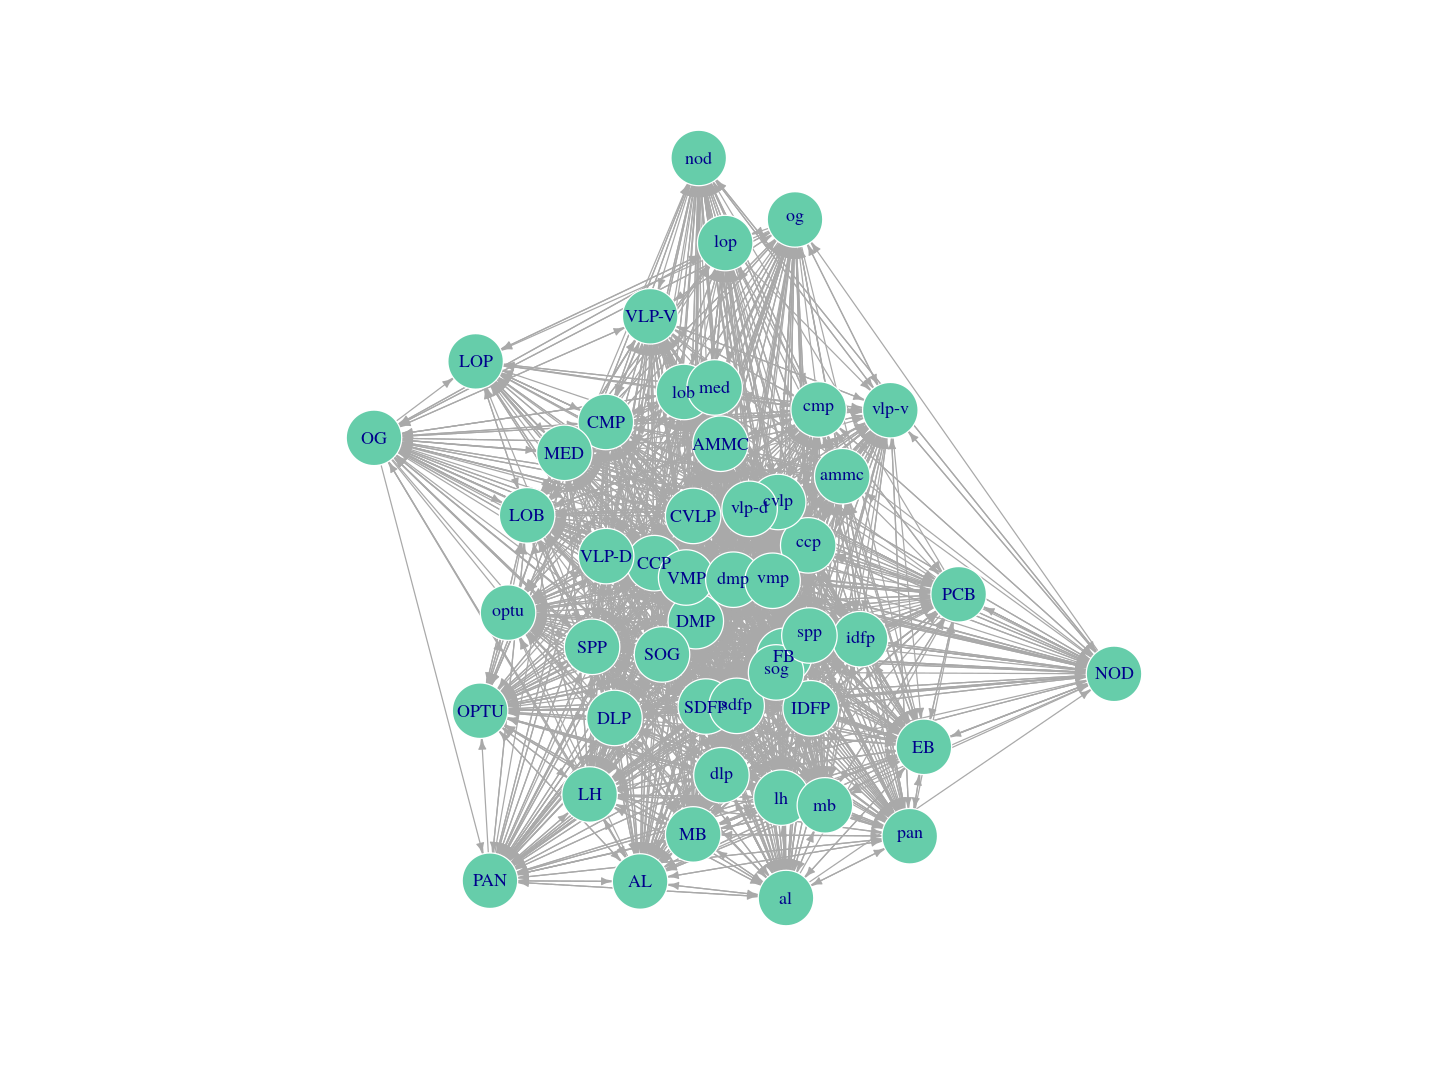

In [7]:
plot(gdros, edge.arrow.size = 0.3, vertex.frame.color = "white", 
     vertex.color = "aquamarine3", vertex.label.cex = .9)

Edge density:

In [8]:
edge_density(gdros)

[1] 0.8290816

## 2. Get matrices

### 2.1. Unweighted and weighted adjacency matrix

In [9]:
A <- get.adjacency(graph = gdros)
W <- as_adjacency_matrix(gdros, attr = "weight")
A[1:5, 1:5]
W[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
     AL AMMC CCP CMP CVLP
AL    .    1   1   1    1
AMMC  1    .   1   1    1
CCP   1    1   .   1    1
CMP   1    1   1   .    1
CVLP  1    1   1   1    .

5 x 5 sparse Matrix of class "dgCMatrix"
           AL      AMMC       CCP       CMP     CVLP
AL    .        23.31957  63.42209   1.00000 115.9714
AMMC 35.02518   .        96.47922 149.28272 964.5471
CCP  15.15587  98.71595   .        99.04627 334.1768
CMP  10.41421  73.93845  64.91628   .       253.5228
CVLP 50.83450 268.67187 350.10114 314.75709   .     

### 2.2. Laplacian

In [10]:
L <- laplacian_matrix(gdros, normalized = T)
L[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
               AL        AMMC         CCP           CMP        CVLP
AL    1.000000000 -0.00376258 -0.01023307 -0.0001613486 -0.01871183
AMMC -0.006334355  1.00000000 -0.01744841 -0.0269979993 -0.17443975
CCP  -0.001726086 -0.01124266  1.00000000 -0.0112802760 -0.03805904
CMP  -0.003295371 -0.02339635 -0.02054146  1.0000000000 -0.08022226
CVLP -0.003801714 -0.02009292 -0.02618270 -0.0235394546  1.00000000

Is this matrix the weighted or unweighted normalised Laplacian? Look at the documentation of `laplacian_matrix`.

In [11]:
?laplacian_matrix

## 3. Degree

Maximum degree and degree distribution

In [12]:
deg <- degree(gdros)
summary(deg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   73.00   83.00   79.59   88.00   96.00 

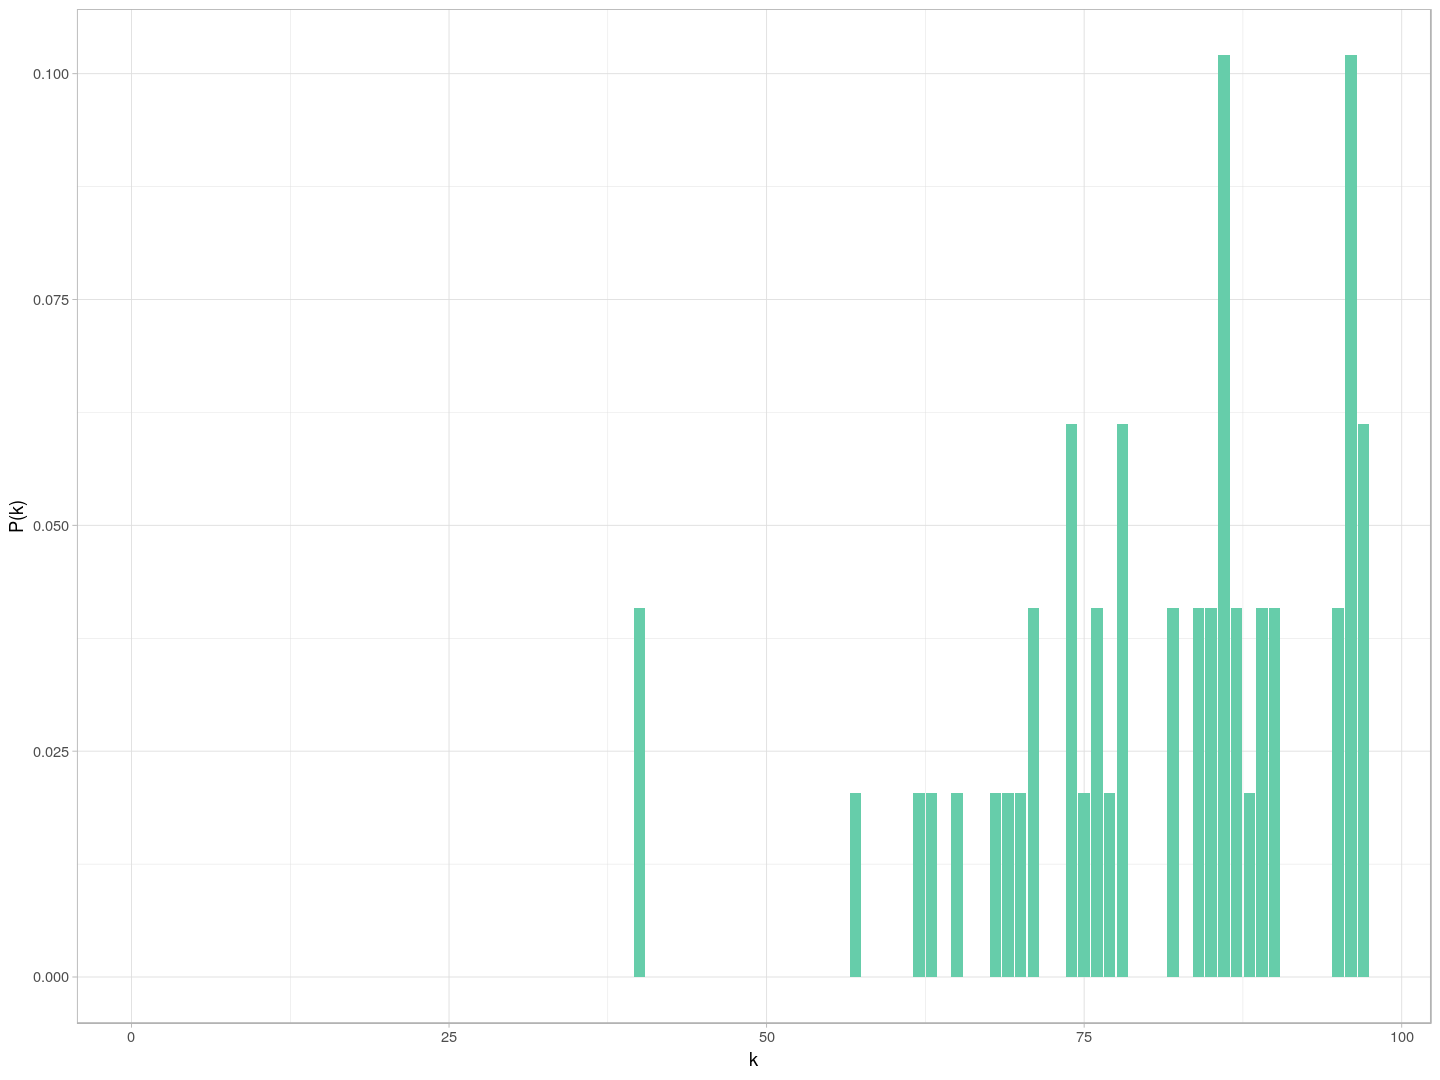

In [13]:
ggplot(data = data.frame("pk" = degree_distribution(gdros)), aes(x = 1:length(pk), y = pk)) +
  geom_col(fill = "aquamarine3") +
  labs(x = "k", y = "P(k)")

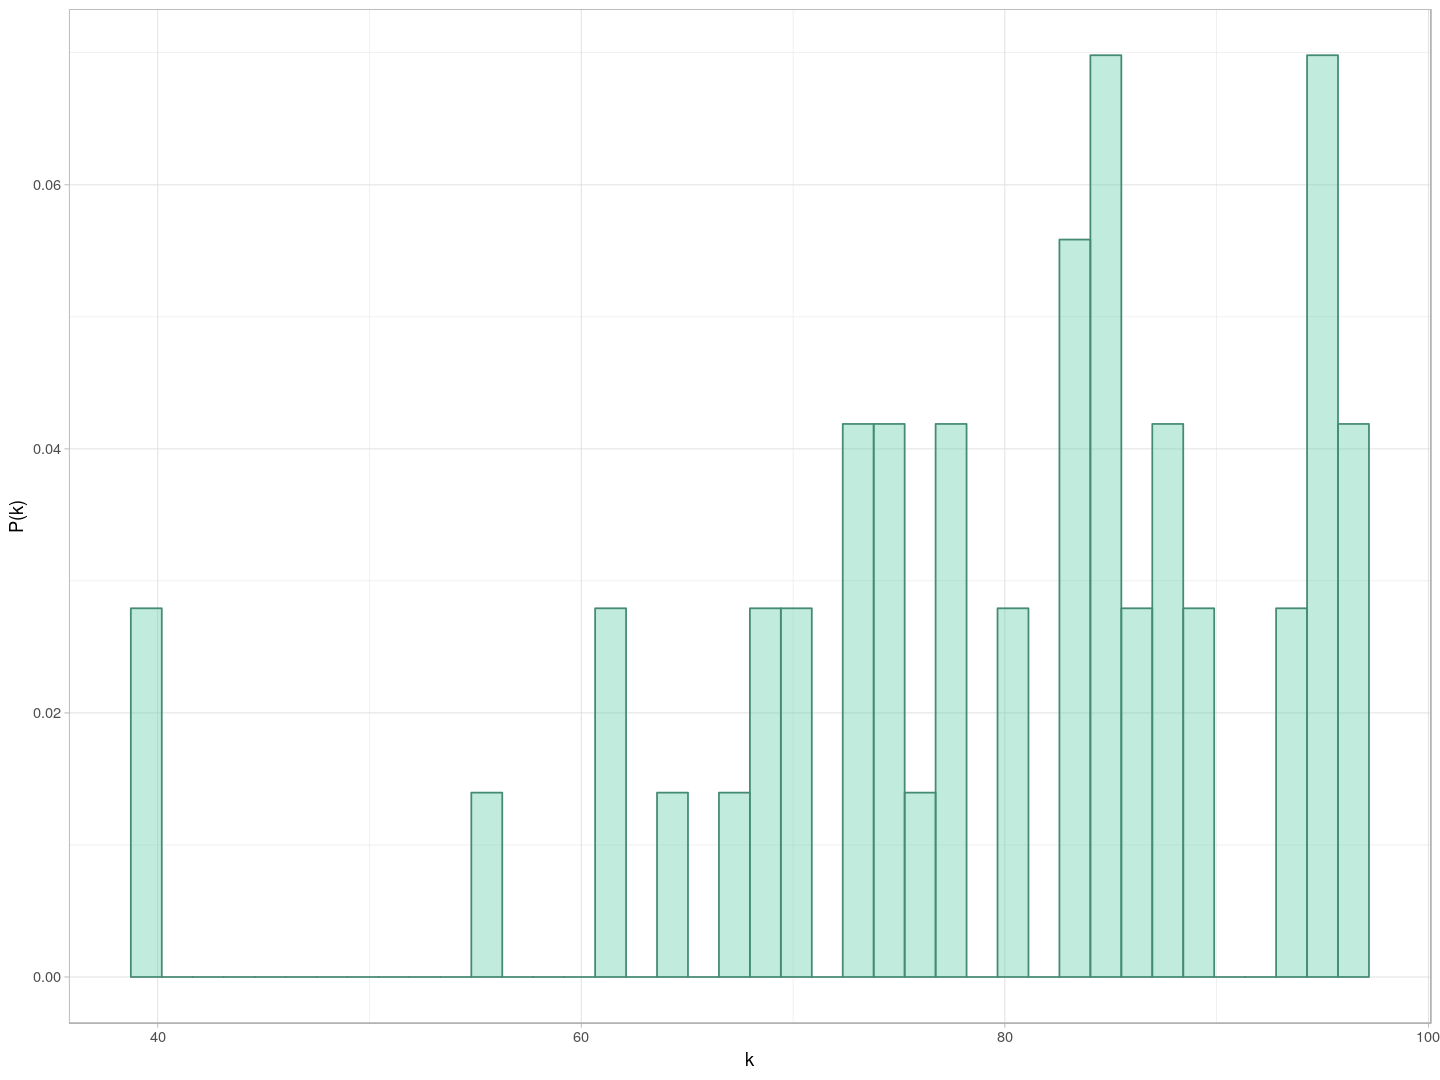

In [14]:
ggplot(data = data.frame("pk" = degree(gdros)), aes(pk)) +
  geom_histogram(aes(y = ..density..), bins = 40, color = "aquamarine4", fill = "aquamarine3", alpha = .4) +
  labs(x = "k", y = "P(k)")

Plot the drosophila network, with vertex size depending on vertex degree.

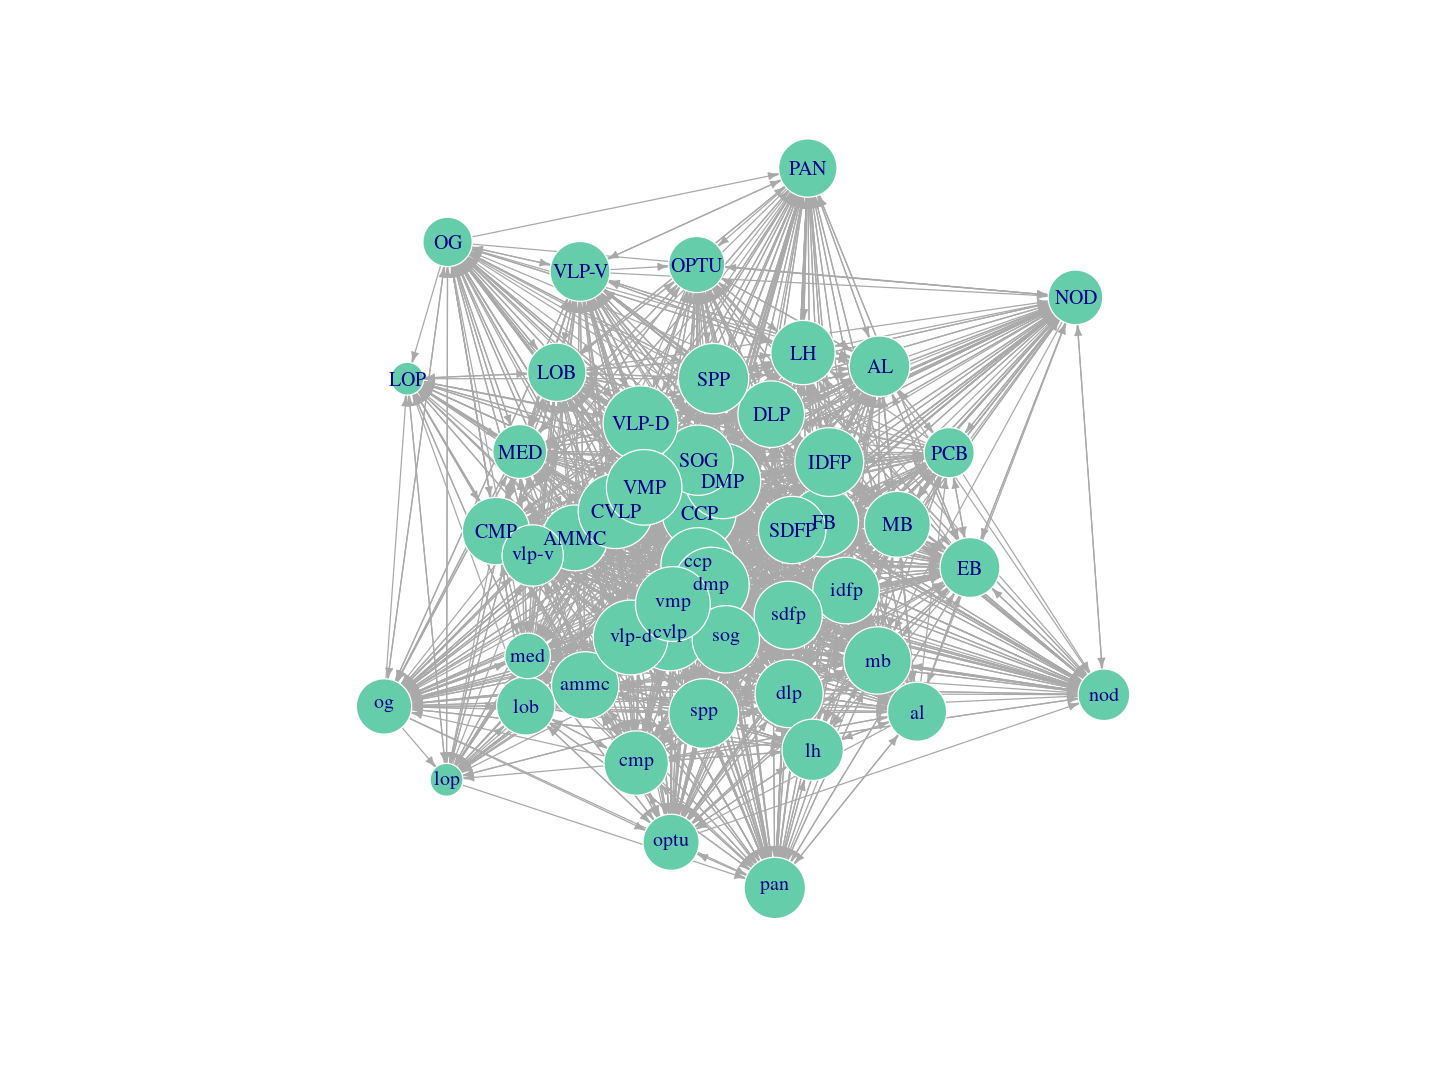

In [15]:
plot(gdros, edge.arrow.size = 0.3, vertex.frame.color = "white", 
     vertex.color = "aquamarine3", vertex.size = 1 + 10*degree(gdros, normalized = T))

# Open Source Network Data

There are different sources of curated network datasets, a couple of examples are:
* [The Networkrepository](http://networkrepository.com/)
* [The UCI Network Data Repository](https://networkdata.ics.uci.edu/)
* [Index of Complex Networks](https://icon.colorado.edu/#!/networks)

Further some research groups release data after publishing their work, so you can often find the data in the supplementaries or on lab's webpages, e.g. [CoMuNe data](https://comunelab.fbk.eu/data.php).

Try importing some datasets.

### 1. An Arabidopsis Interactome Network Map

[Arabidopsis Interactome Network Map on CCSB](http://interactome.dfci.harvard.edu/A_thaliana/)

Data have been downloaded and stored in the `./data/` folder.

In [16]:
df <- read_excel("data/AI_interactions.xls")

In [17]:
head(df)

ida       idb       main_screen repeat_screen lci lci_binary lci_core
1 AT1G05410 AT3G10140 1           0             0   0          0       
2 AT3G54850 AT5G19010 1           0             0   0          0       
3 AT3G07780 AT5G66720 1           0             0   0          0       
4 AT1G80040 AT5G66720 1           0             0   0          0       
5 AT1G09660 AT2G38610 1           0             0   0          0       
6 AT1G15385 AT4G24840 1           0             0   0          0

In [18]:
dim(df)

[1] 11374     7

In [19]:
g <- graph_from_edgelist(as.matrix(df[, 1:2]))

In [20]:
length(V(g))

[1] 4866

In [21]:
length(E(g))

[1] 11374

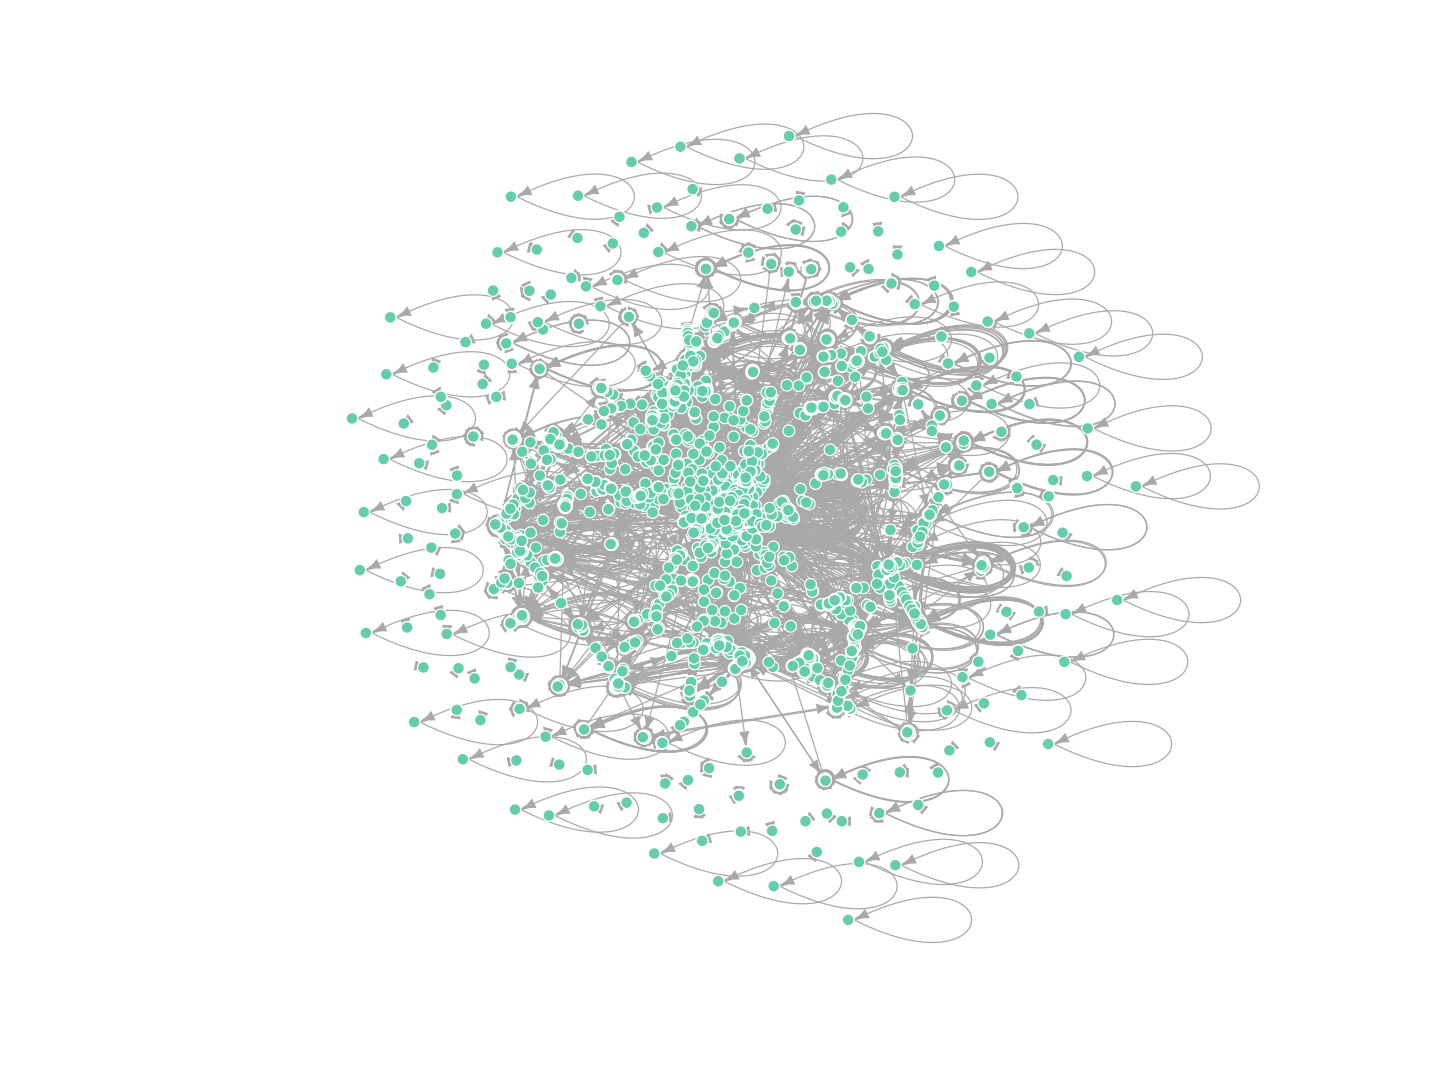

In [22]:
plot(g, vertex.label = NA, vertex.size = 3, edge.arrow.size = 0.4)

### Subgraphs

A **component** (connected component) is a subgraph of $G$, where each vertex $v \in C \subseteq V$ can be reached by all other $u \in C$ following paths running along edges. 

If there are no isolated nodes, i.e. there is a path from every vertex in the network to every other vertex, then the network is **connected**.

##### Take the subgraph given by the largest weakly connected component:

In [23]:
g_comp <- components(g, mode = "weak")

Number of components:

In [24]:
g_comp$no

[1] 161

In [25]:
g_sub <- induced_subgraph(g, V(g)[which(g_comp$membership == which.max(g_comp$csize))])
g_slay <- layout_with_drl(g_sub)

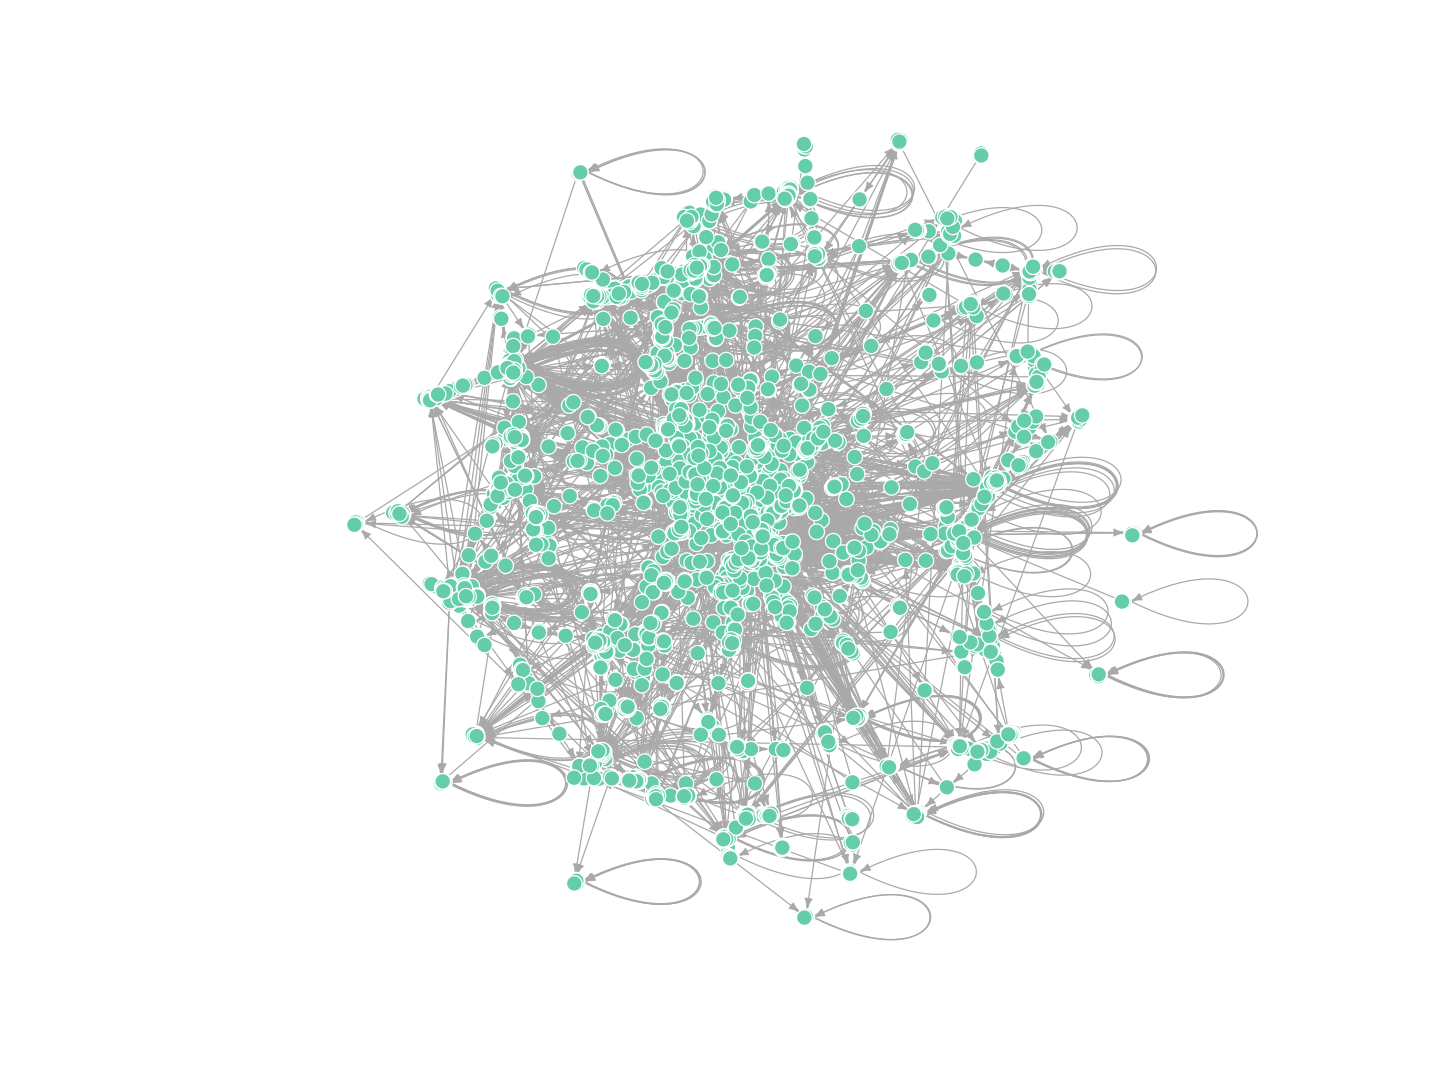

In [26]:
plot(g_sub, layout = g_slay, vertex.label = NA, vertex.size = 4, edge.arrow.size = 0.3)

What fraction of nodes do we keep?

In [27]:
length(V(g_sub))/length(V(g))

[1] 0.9286889

Edge density:

In [28]:
edge_density(g_sub)

[1] 0.0005434729

Edge density in the original network:

In [29]:
edge_density(g)

[1] 0.0004804611

### Degree & Co.

In [30]:
deg <- degree(g_sub, normalized = F)

In [31]:
summary(deg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   4.911   5.000 269.000 

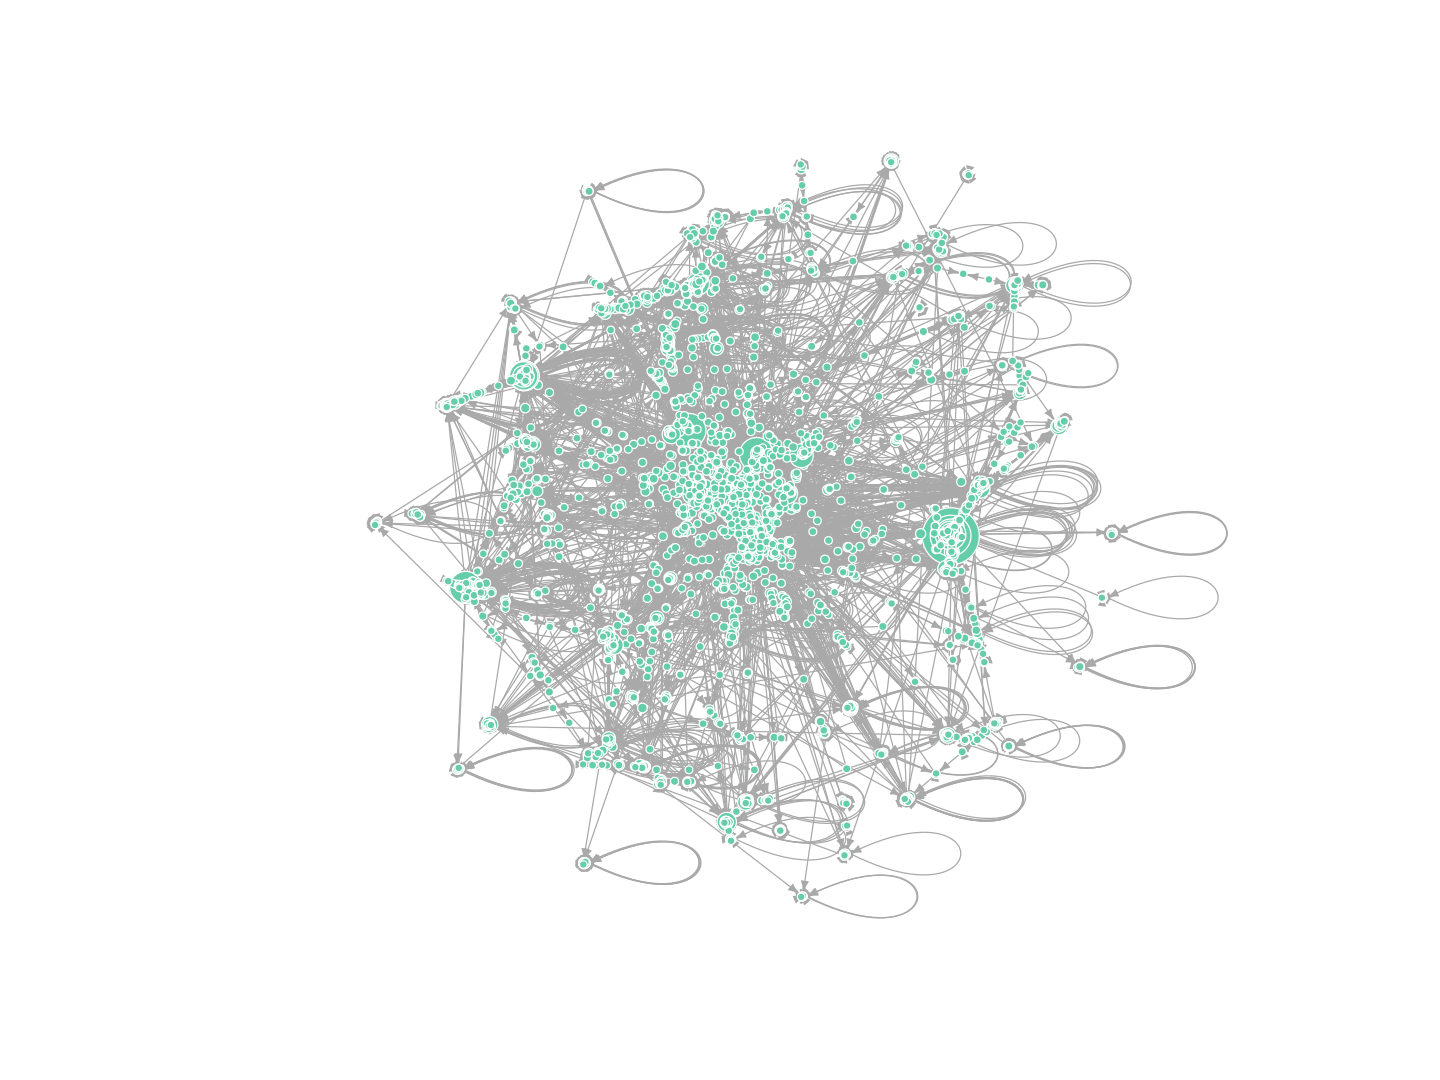

In [32]:
plot(g_sub, layout = g_slay, vertex.label = NA, edge.arrow.size = 0.3, vertex.size = 2 + 0.05*deg)

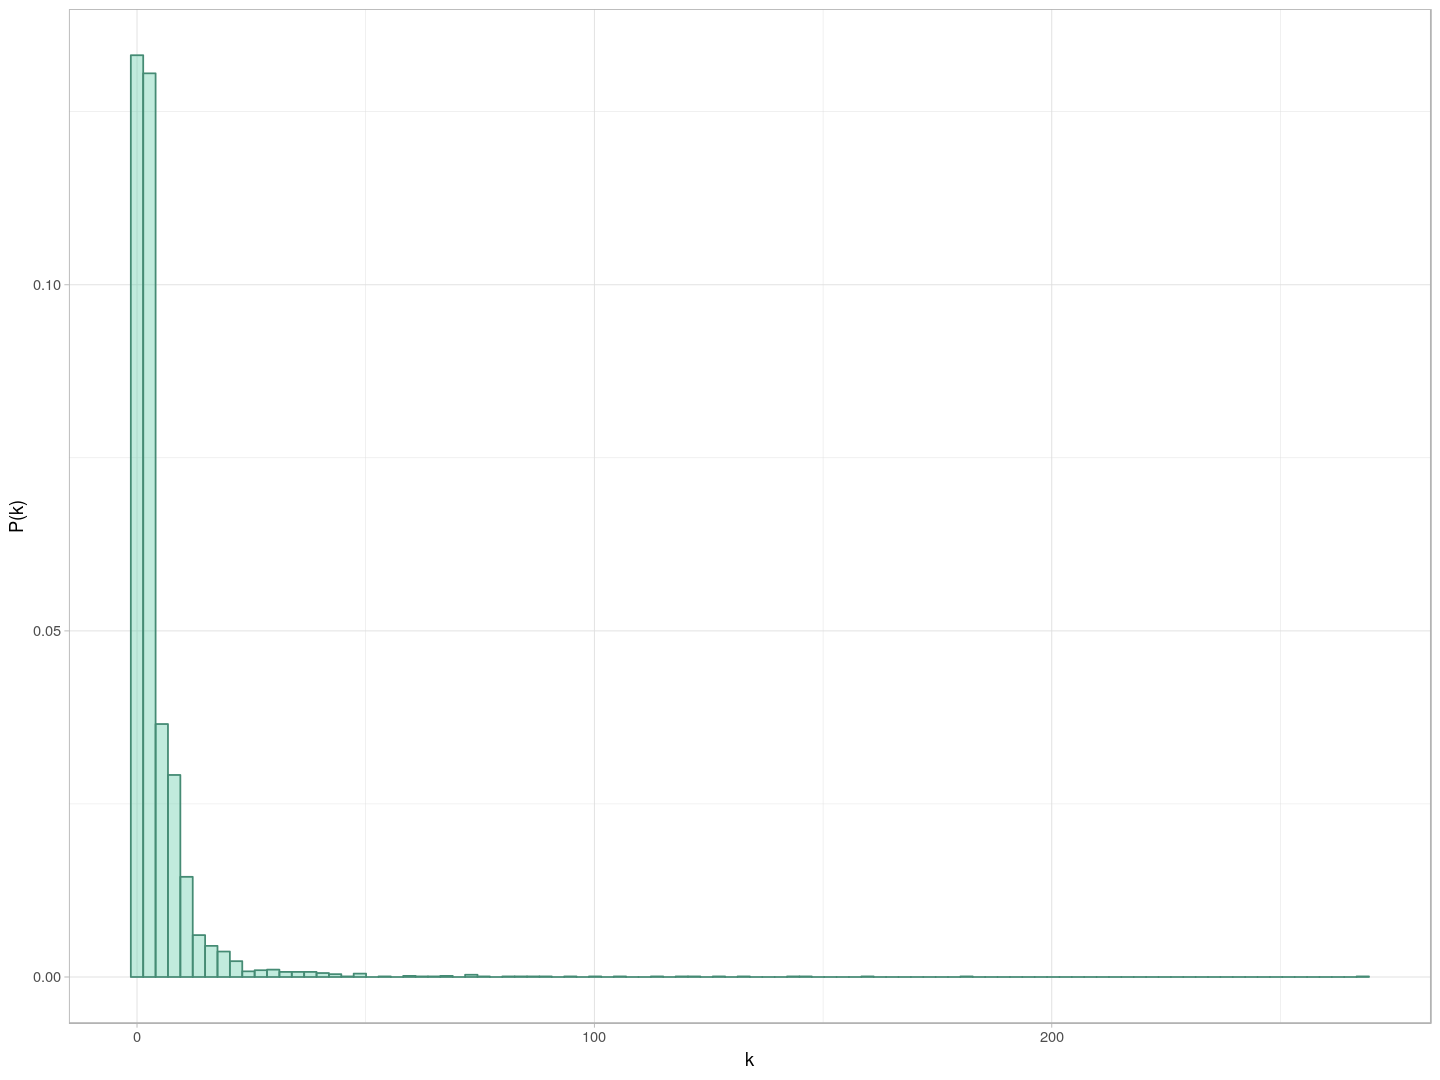

In [33]:
ggplot(data.frame("pk" = degree(g_sub)), aes(pk)) +
  geom_histogram(aes(y = ..density..), bins = 100, 
                 colour = "aquamarine4", fill = "aquamarine3", alpha = .4) +
  labs(x = "k", y = "P(k)") 

### 2. A Foodweb
Consider a marine foodweb, data can be found [here](https://datadryad.org/resource/doi:10.5061/dryad.b8r5c) and are indexed on the [Index of Complex Networks](https://icon.colorado.edu/#!/networks), `foodweb` subdomain - Coastal food webs with metazoan parasites.

Reference paper [Dunne et al. 2013](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1001579#s4).

In [34]:
data <- read_excel("data/Dunne2013PBioSupData.xlsx", sheet = 3)

New names:
* `` -> `..2`
* `` -> `..3`
* `` -> `..5`
* `` -> `..6`
* `` -> `..8`


In [35]:
data %>% head

FalsFree.web ..2 ..3 FalsPar.web ..5 ..6 FalsParCon.web ..8
1 18            2  NA  18           2  NA  18              2 
2 18            5  NA  18           5  NA  18              5 
3 19            2  NA  19           2  NA  19              2 
4 19           10  NA  19          10  NA  19             10 
5 20            2  NA  20           2  NA  20              2 
6 20           10  NA  20          10  NA  20             10

Let us take the last edgelist, where we have free-living taxa, parasite taxa and concomitant links (links from predators to parasites of their preys).

In [36]:
data <- data[, 7:8]

In [37]:
head(data)

FalsParCon.web ..8
1 18              2 
2 18              5 
3 19              2 
4 19             10 
5 20              2 
6 20             10

Let us also read the second sheet of the same excel file, containing nodes metadata.

In [38]:
nodes <- read_excel("data/Dunne2013PBioSupData.xlsx", sheet = 2, skip = 1)
nodes %>% head

New names:
* ID -> ID..1
* Type -> Type..2
* Name -> Name..3
* `` -> `..4`
* ID -> ID..5
* … and 22 more


ID..1 Type..2 Name..3              ..4 ID..5 Type..6 Name..7              ..8
1 1     1       carrion-detritus     NA  1     1       carrion-detritus     NA 
2 2     1       marine-detritus      NA  2     1       marine-detritus      NA 
3 3     1       terrestrial-detritus NA  3     1       terrestrial-detritus NA 
4 4     1       Saltwort             NA  4     1       Salt Grass           NA 
5 5     1       epipellic flora      NA  5     1       epipellic flora      NA 
6 6     1       Alkali Heath         NA  6     1       Alkali Heath         NA 
  ID..9 Type..10 ⋯ Type..18 Name..19        ..20 ID..21 Type..22
1 1     1        ⋯ 1        phytoplankton   NA   1      1       
2 2     1        ⋯ 1        benthic-diatoms NA   2      1       
3 3     1        ⋯ 1        macroalgae      NA   3      1       
4 4     1        ⋯ 1        zooplankton     NA   4      1       
5 5     1        ⋯ 1        meiofauna       NA   5      1       
6 6     1        ⋯ 1        bacteria        NA   6      1       
  Name..23                 ..24 ID..25 Type..26 Name..27            
1 detritus/poc/doc         NA   1      2        Cryptocotyle lingua 
2 carrion                  NA   2      2        Himasthla elongata  
3 phytoplankton            NA   3      2        Renicola roscorita  
4 benthic diatoms/epiphyts NA   4      2        Cercariae lebouri   
5 macroalgae               NA   5      2        Podocotyle staffordi
6 seagrass                 NA   6      2        Cryptocotyle jejuna

In [39]:
nodes <- nodes[, 1:3]
colnames(nodes) <- c("id", "type", "name")

In [40]:
nodes <- nodes[complete.cases(nodes), ]

In [41]:
g <- graph_from_data_frame(d = data, vertices = nodes)

In [42]:
g

IGRAPH 157a7d7 DN-B 171 3720 -- 
+ attr: name (v/c), type (v/n)
+ edges from 157a7d7 (vertex names):
[1] foraminiferan                            ->marine-detritus
[2] foraminiferan                            ->epipellic flora
[3] annelid unknown (green saccate thin skin)->marine-detritus
[4] annelid unknown (green saccate thin skin)->phytoplankton  
[5] Capitella capitata                       ->marine-detritus
[6] Capitella capitata                       ->phytoplankton  
[7] capitellid?                              ->marine-detritus
[8] capitellid?                              ->phytoplankton  
+ ... omitted several edges

In [43]:
g_comp <- components(g, mode = "weak")
g_comp$no

[1] 1

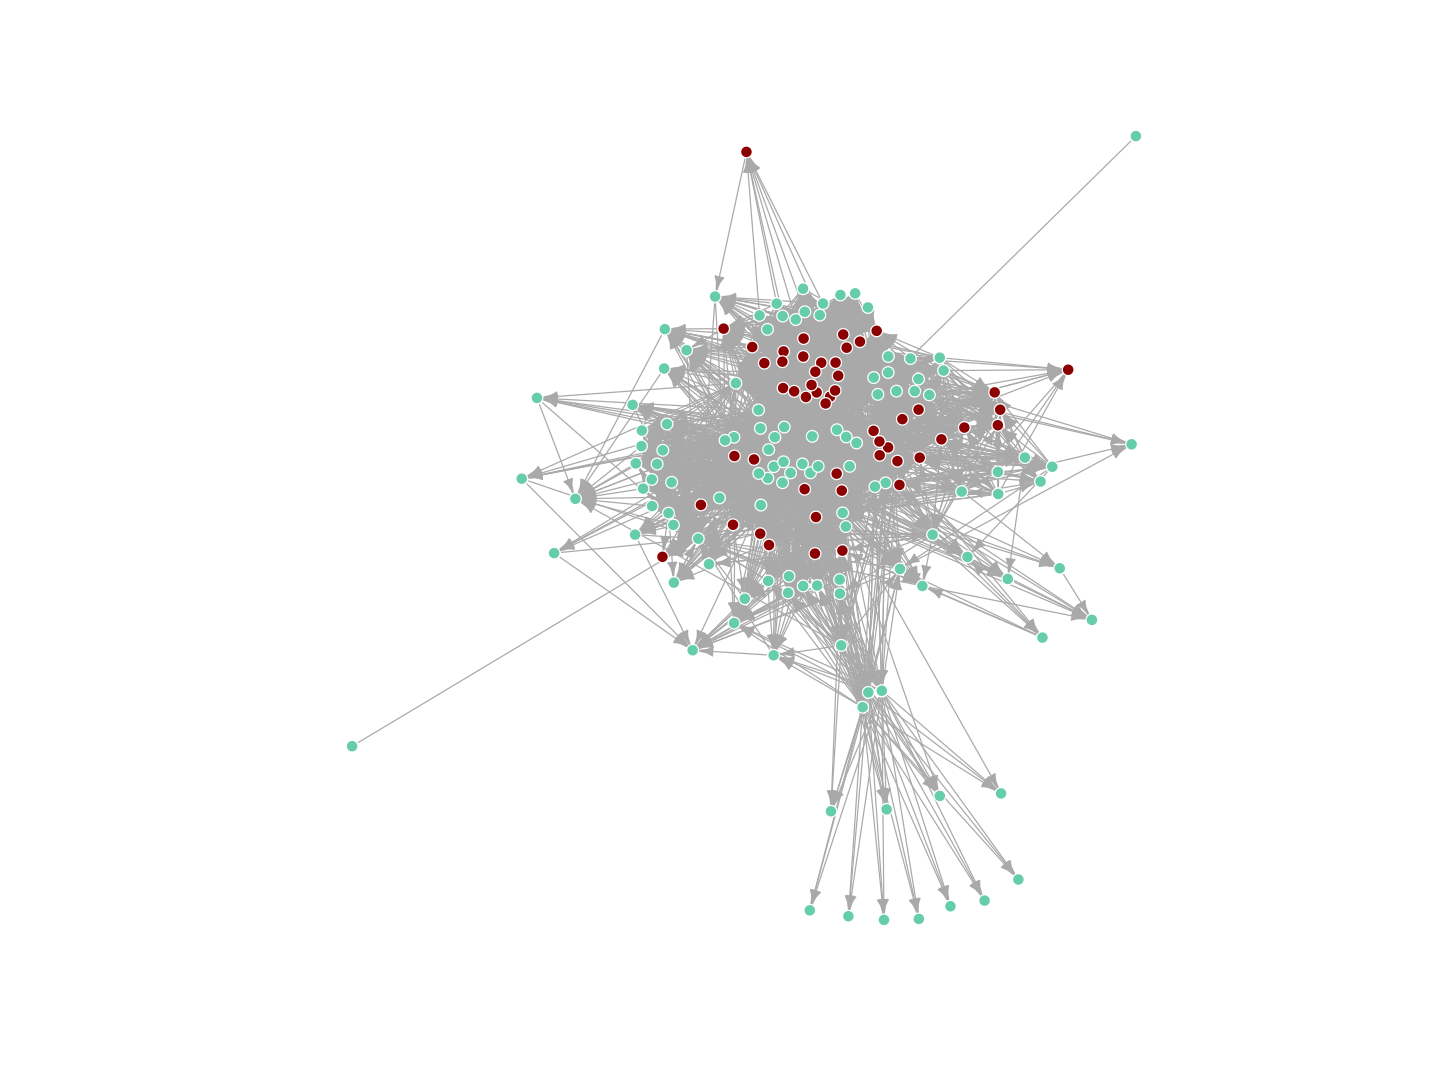

In [44]:
plot(g, vertex.label = "", vertex.size = 3, edge.arrow.size = .4,
     vertex.color = c("aquamarine3", "darkred")[V(g)$type])

In [45]:
g_comp <- components(g, mode = "strong")
g_comp$no
which.max(g_comp$csize)

[1] 62

[1] 4

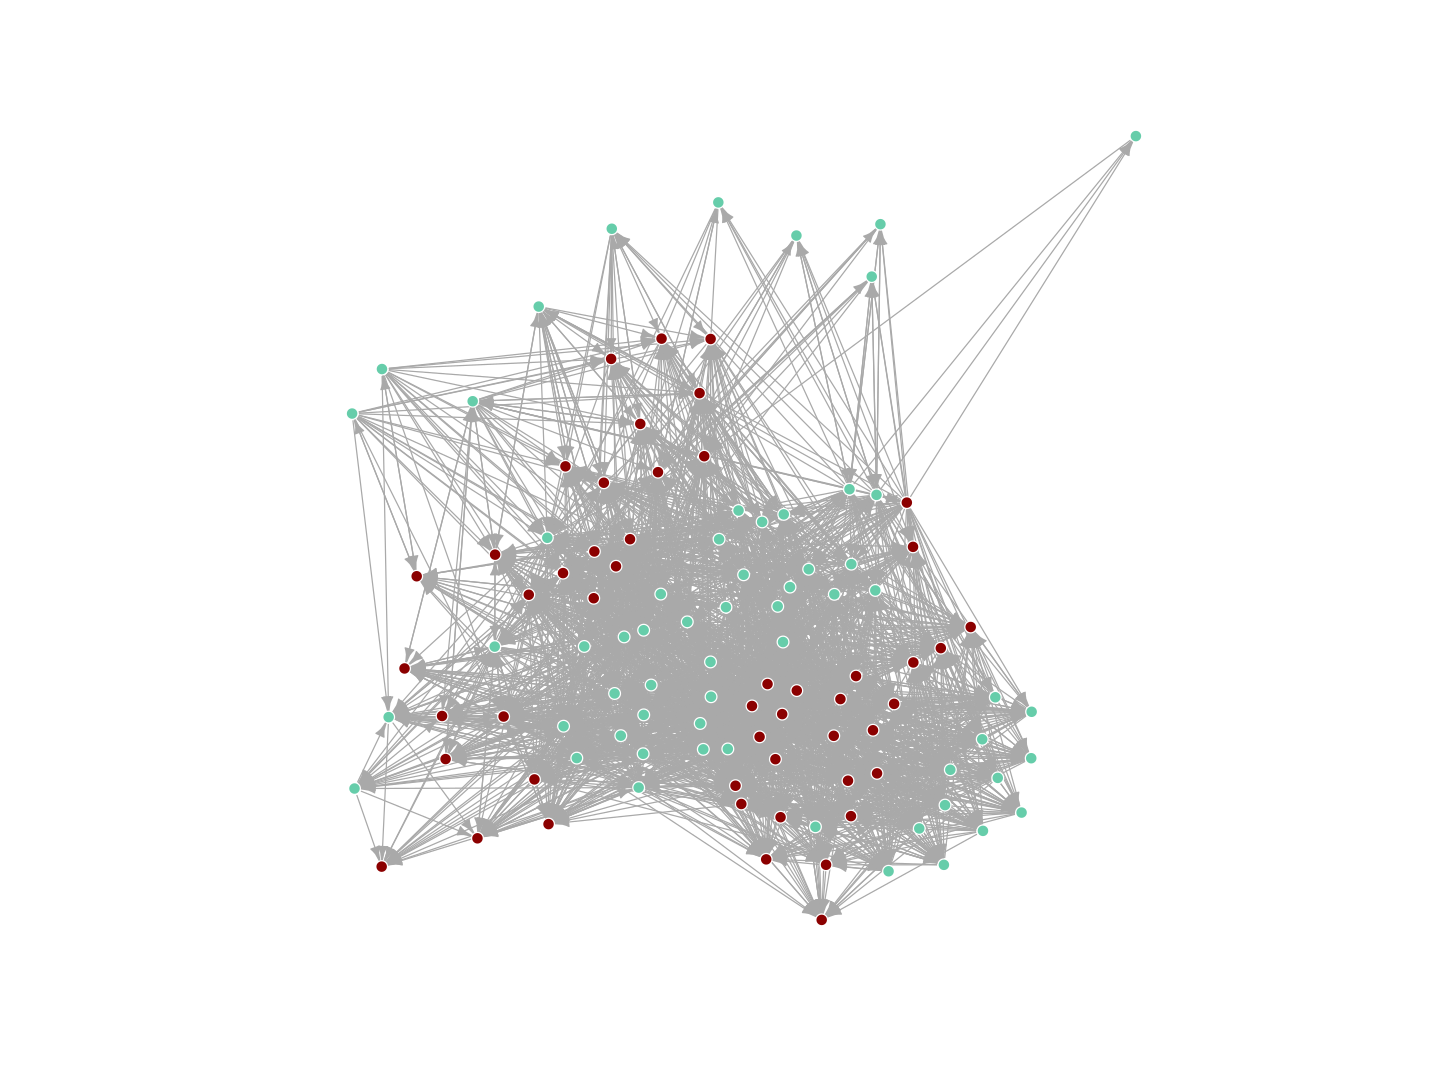

In [46]:
plot(induced_subgraph(g, V(g)[g_comp$membership == 4]), vertex.label = "", vertex.size = 3, edge.arrow.size = .4,
     vertex.color = c("aquamarine3", "darkred")[V(g)$type[g_comp$membership == 4]])

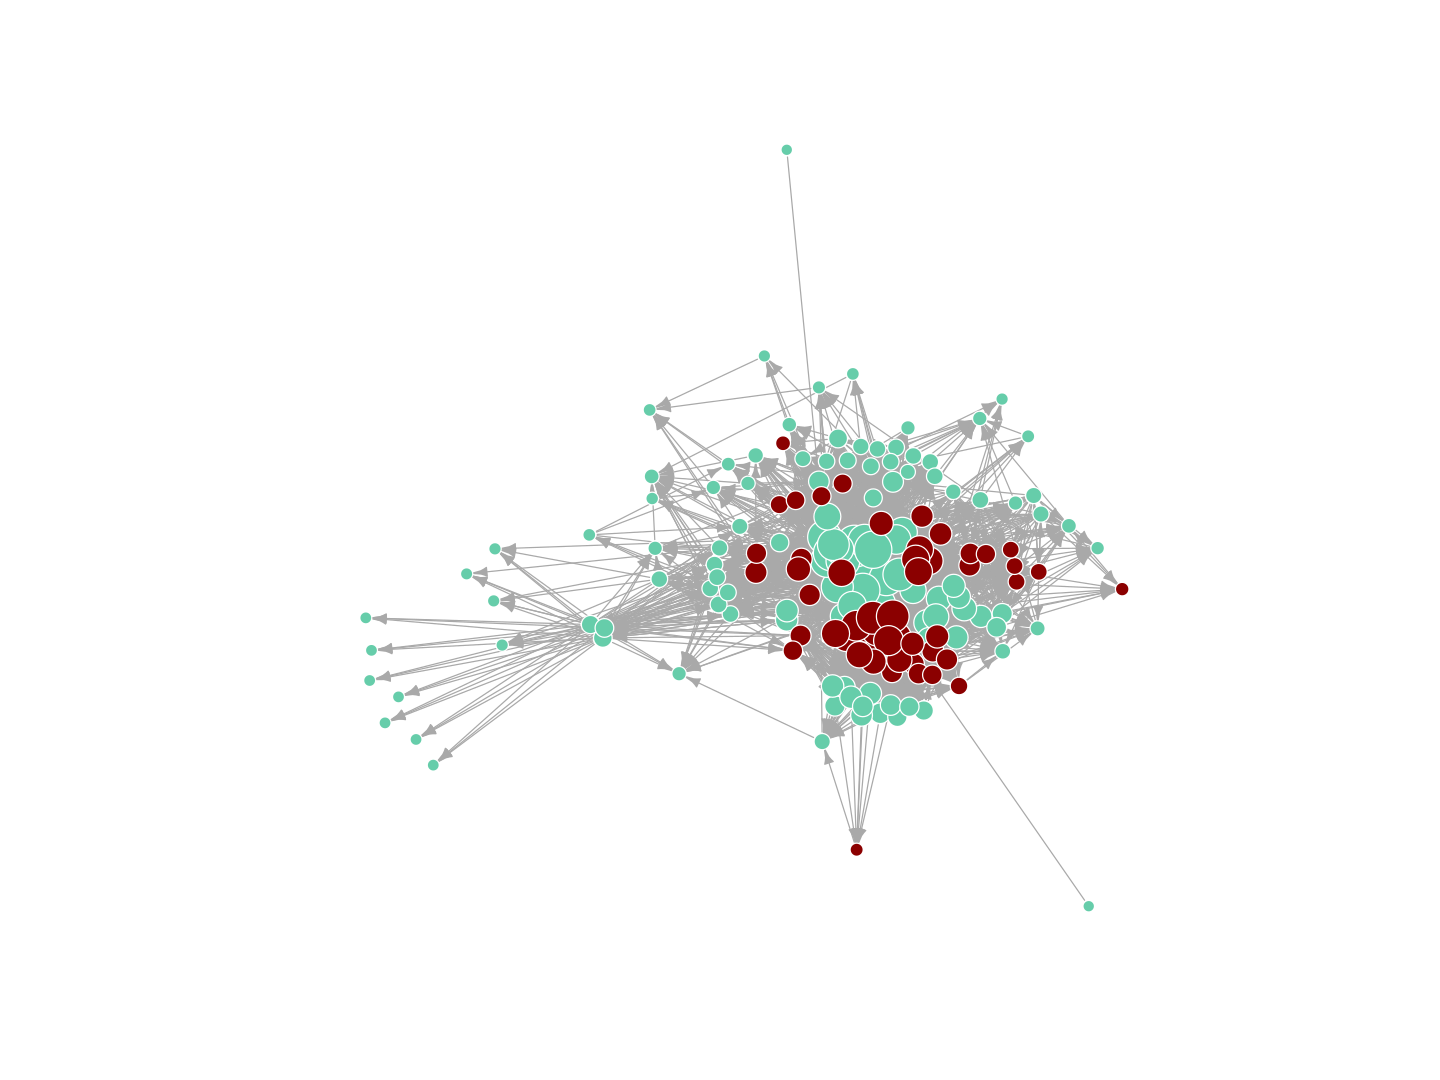

In [47]:
deg <- degree(g, normalized = T)
plot(g, vertex.label = "", vertex.size = 3 + 10*deg, edge.arrow.size = .4,
     vertex.color = c("aquamarine3", "darkred")[V(g)$type])

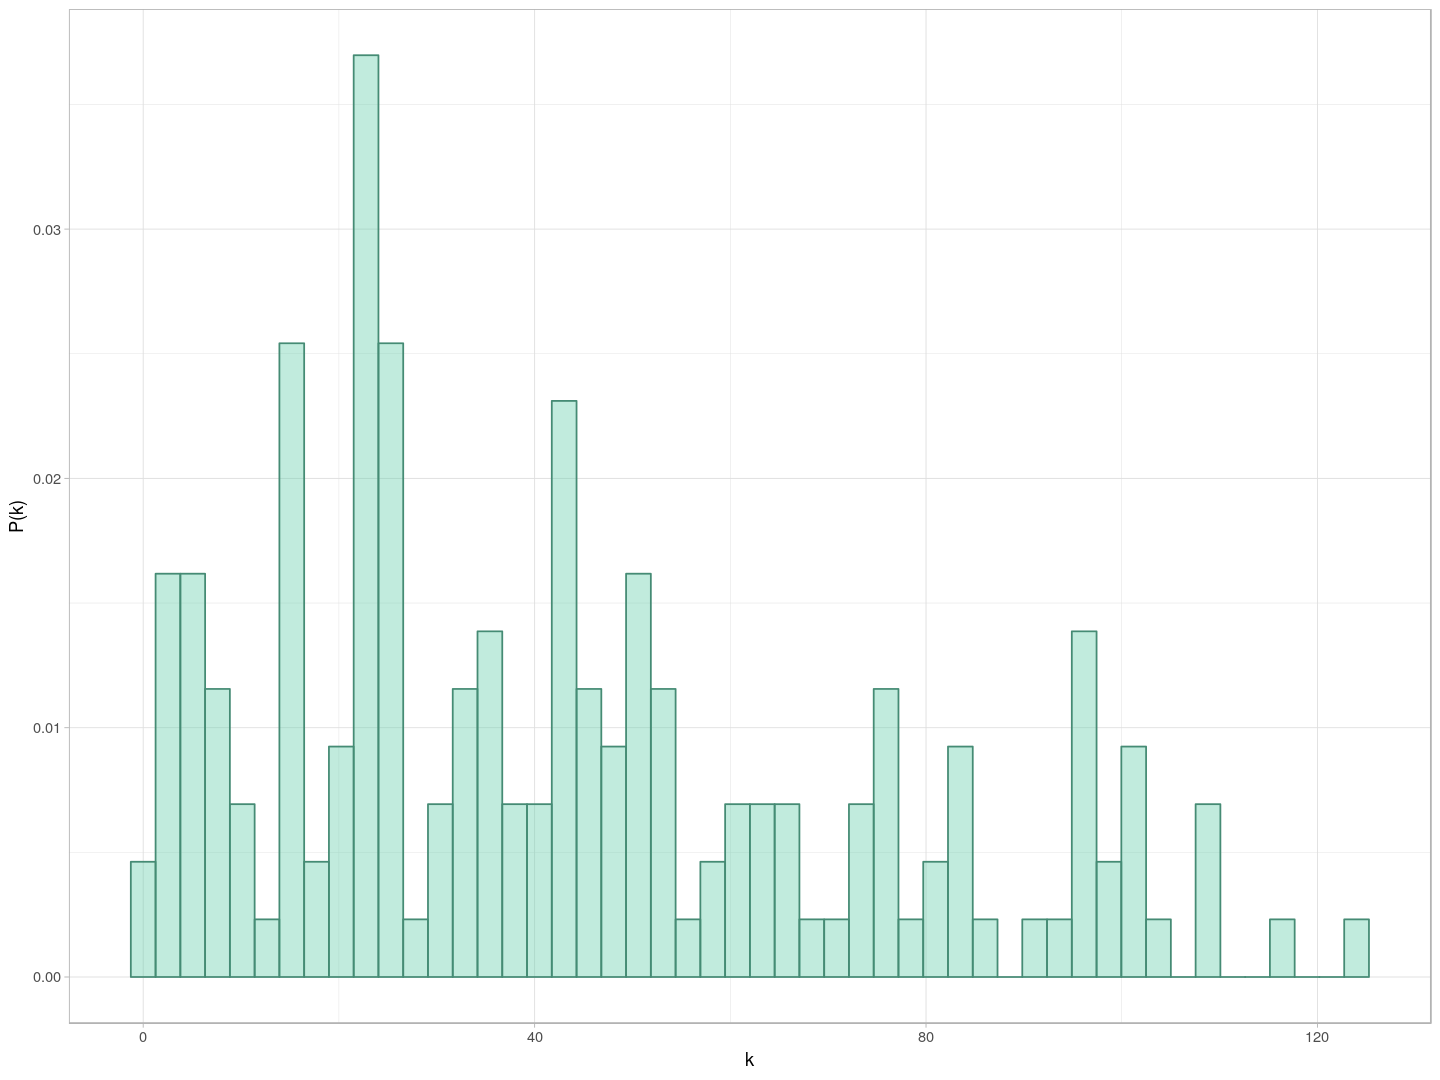

In [48]:
deg <- degree(g, normalized = F)
ggplot(data.frame("deg" = deg), aes(deg)) +
    geom_histogram(aes(y = ..density..), bins = 50, 
                 colour = "aquamarine4", fill = "aquamarine3", alpha = .4) +
  labs(x = "k", y = "P(k)")

In [49]:
g_layout <- layout_with_fr(g)

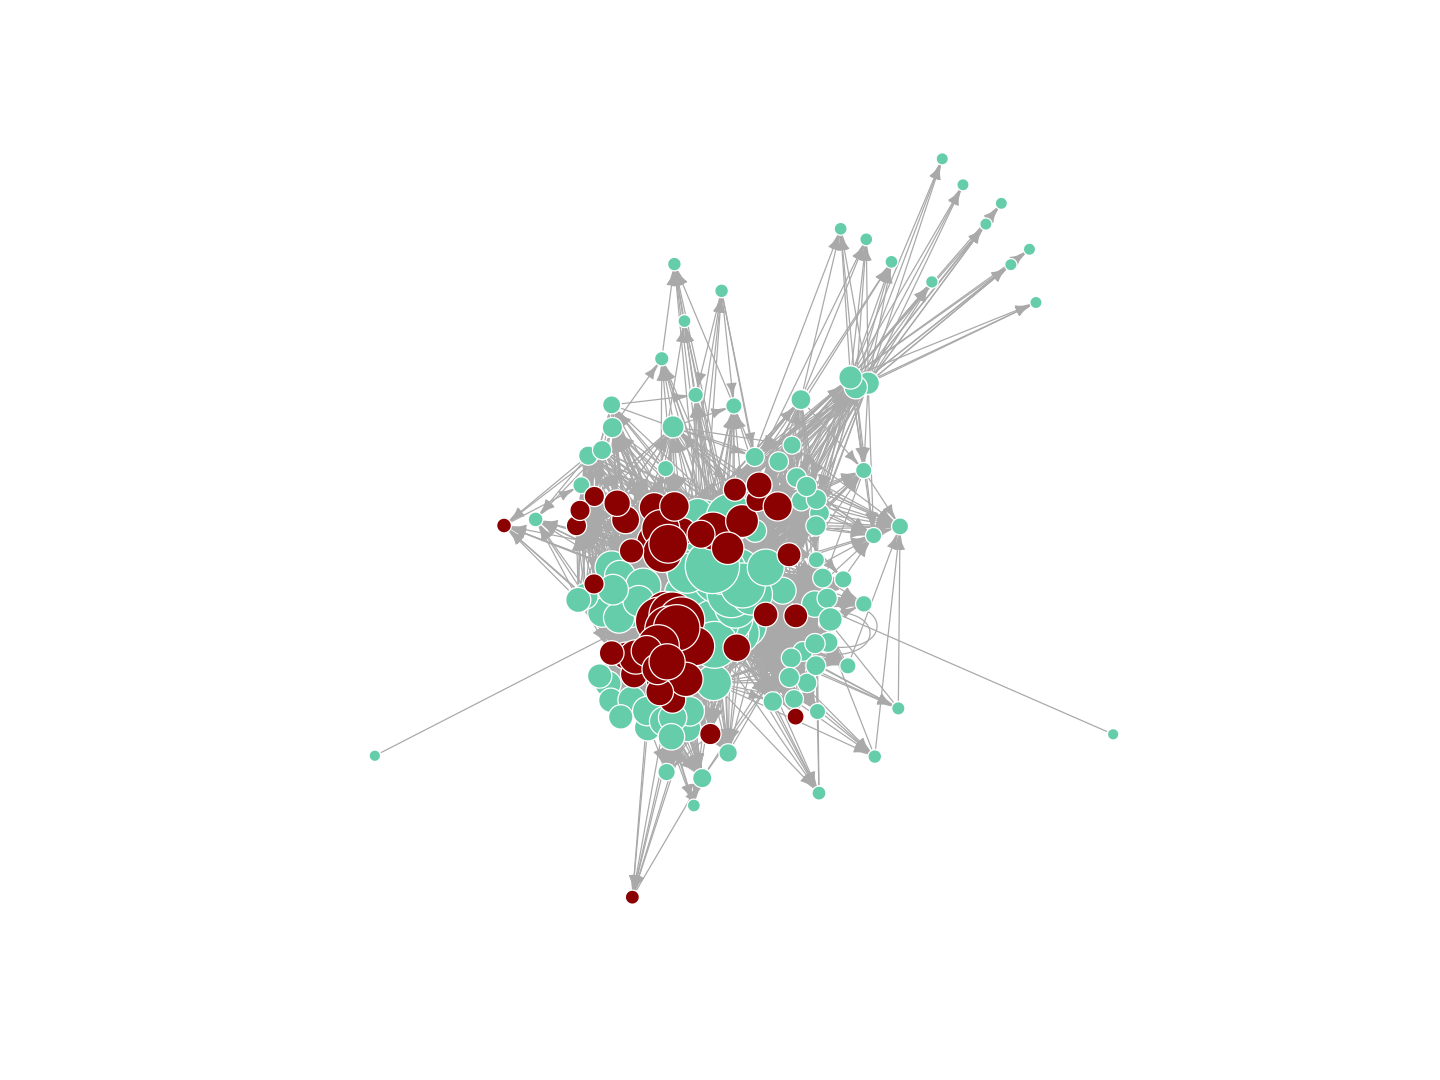

In [50]:
plot(g, layout = g_layout, edge.arrow.size = .4,
     vertex.label = "", vertex.size = 3 + deg/10, 
     vertex.color = c("aquamarine3", "darkred")[V(g)$type])

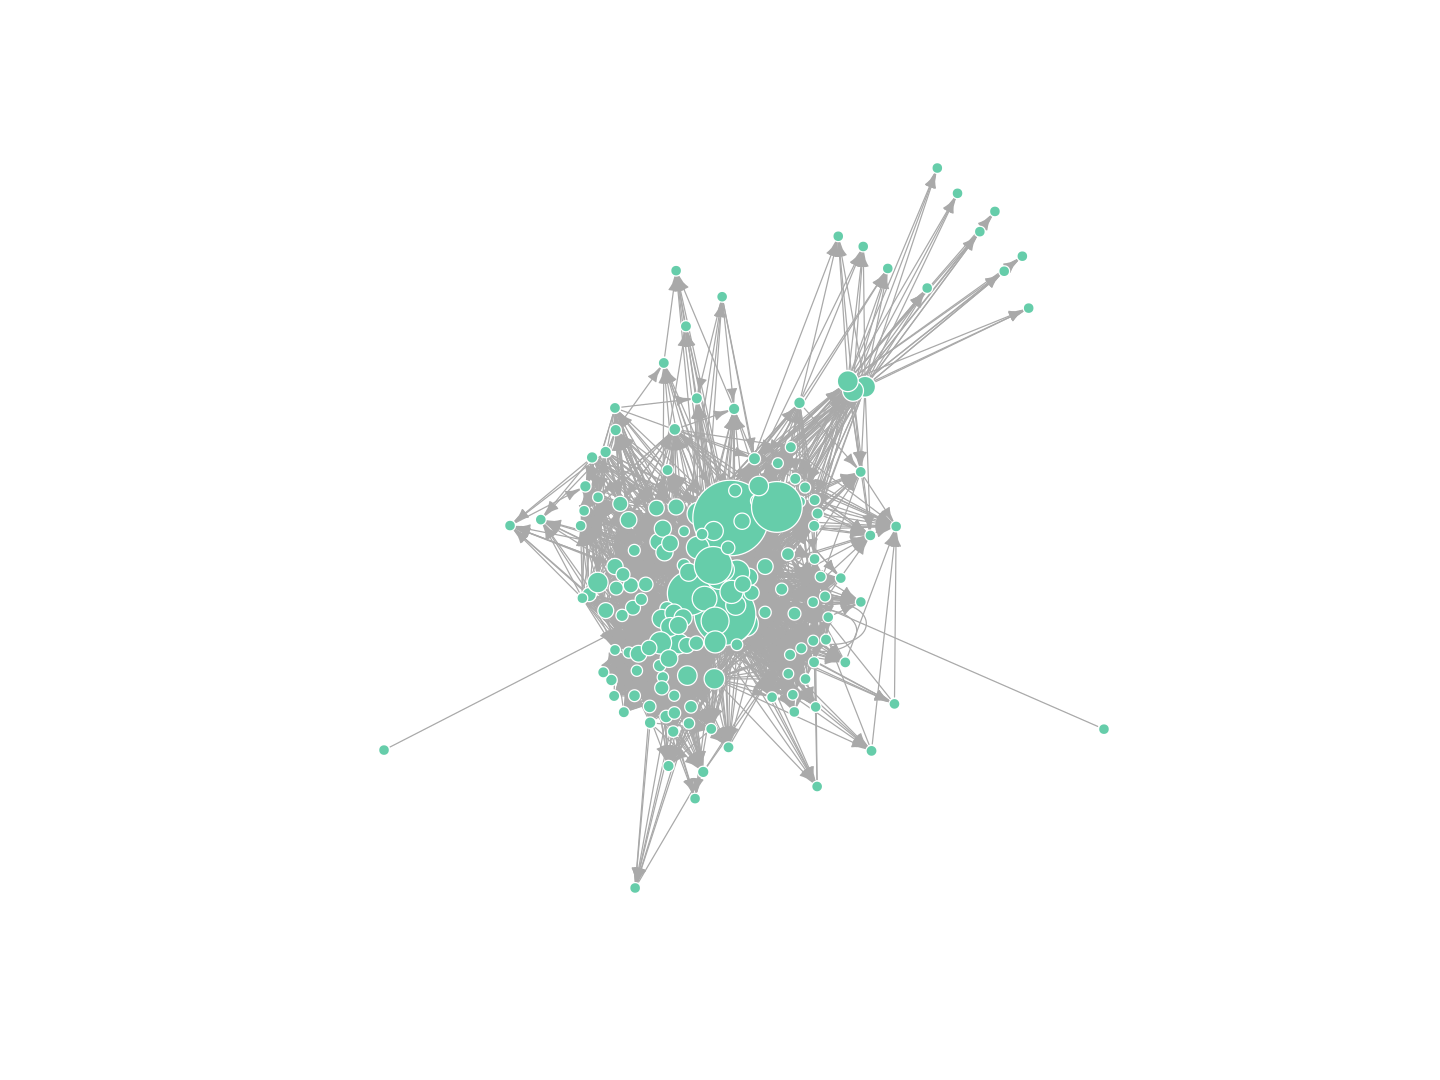

In [51]:
plot(g, layout = g_layout, vertex.size = 3 + 0.01*betweenness(g), 
    vertex.label = "", edge.arrow.size = .4,)

In [52]:
btw <- betweenness(g)
V(g)[which.max(btw)]

+ 1/171 vertex, named, from 157a7d7:
[1] Striped Shore Crab

In [53]:
btw[which.max(btw)]

Striped Shore Crab 
          1800.336

In [54]:
g2 <- delete_vertices(g, v = V(g)[which.max(btw)])

In [55]:
edge_density(g2)

[1] 0.1259659

In [56]:
edge_density(g)

[1] 0.127967

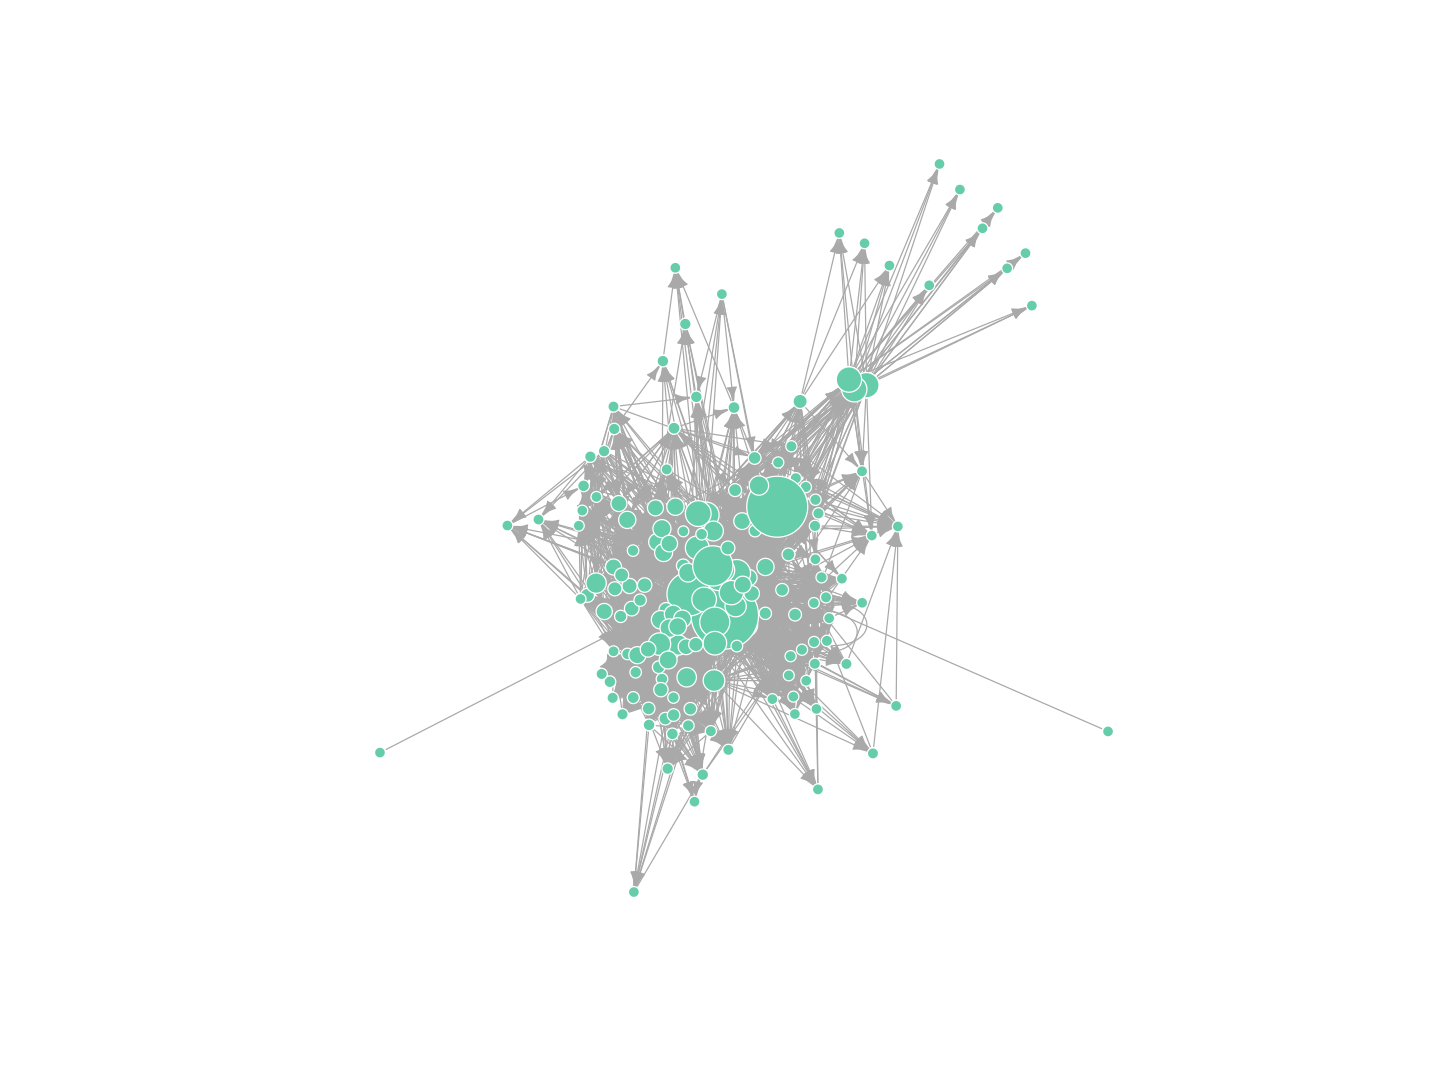

In [57]:
plot(g2, layout = g_layout[- which.max(btw), ], edge.arrow.size = .4,
     vertex.size = 3 + 0.01*betweenness(g2),
     vertex.label = "")

In [58]:
lcc <- vector()
lcc[1] <- length(V(g))
lcc[2] <- length(V(g2))

In [59]:
lcc

[1] 171 170

# Network Models

Generate synthetic networks from different models (Random graphs, Small World, Scale-free networks...) and compare their degree distributions, diameters, average shortest-path length and community structure.

1. Generate an Erdos - Renyi (or equivalently a Gilbert) model $G(N, p)$

In [60]:
er <- erdos.renyi.game(400, p = 0.1)

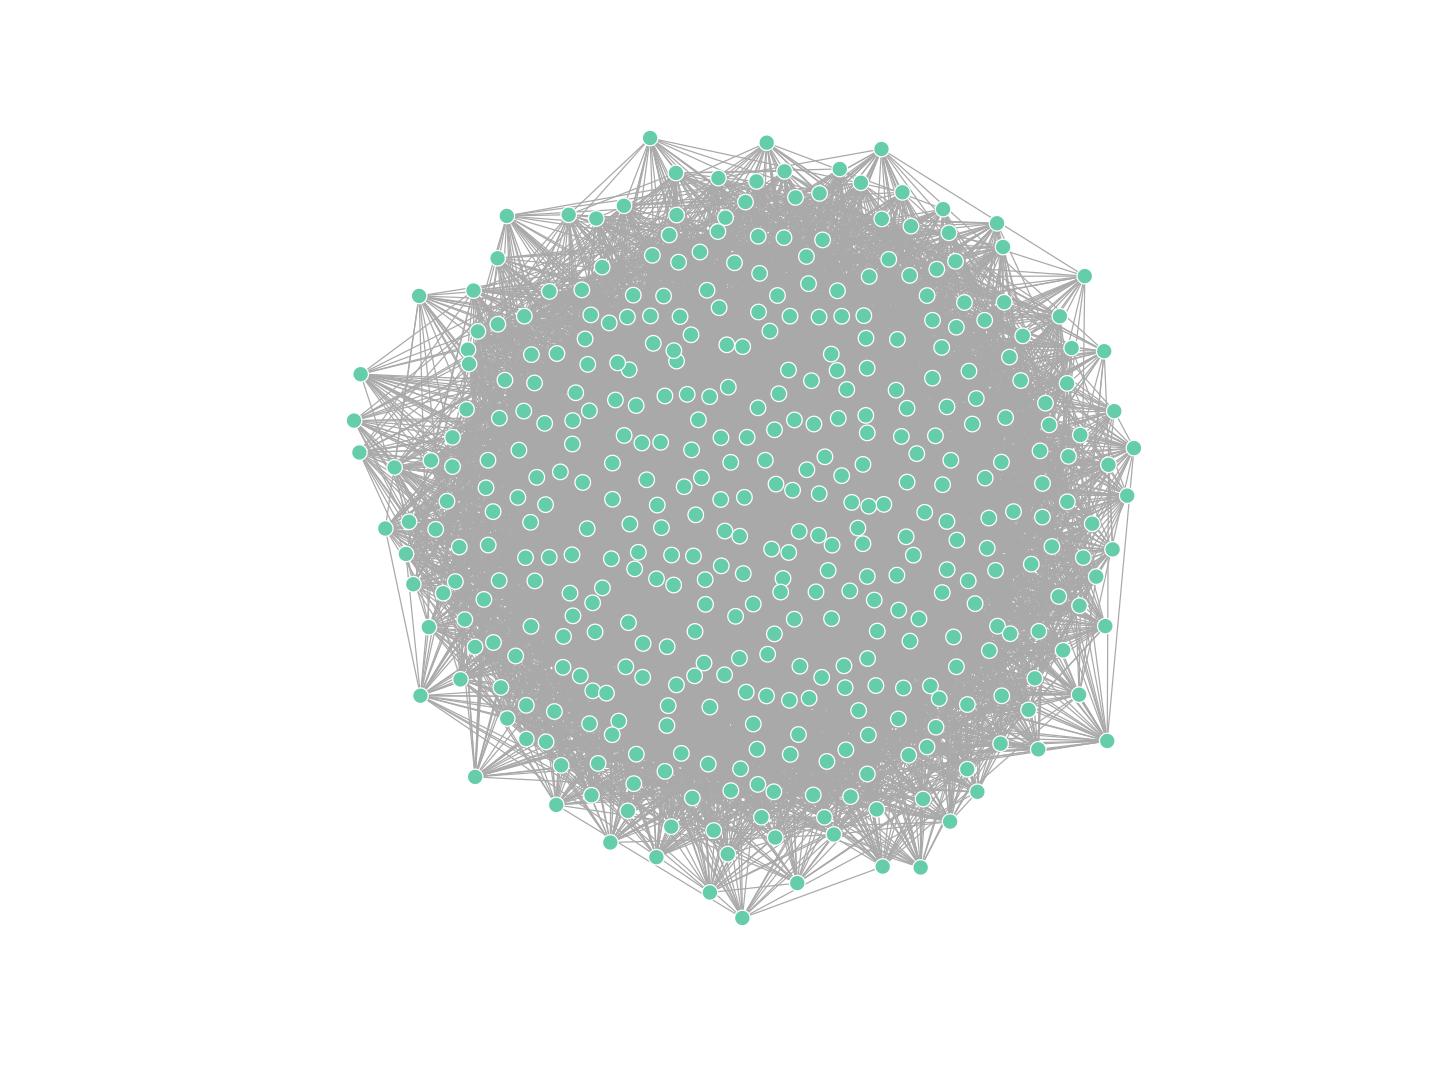

In [61]:
plot(er, vertex.size = 4, vertex.label = NA)

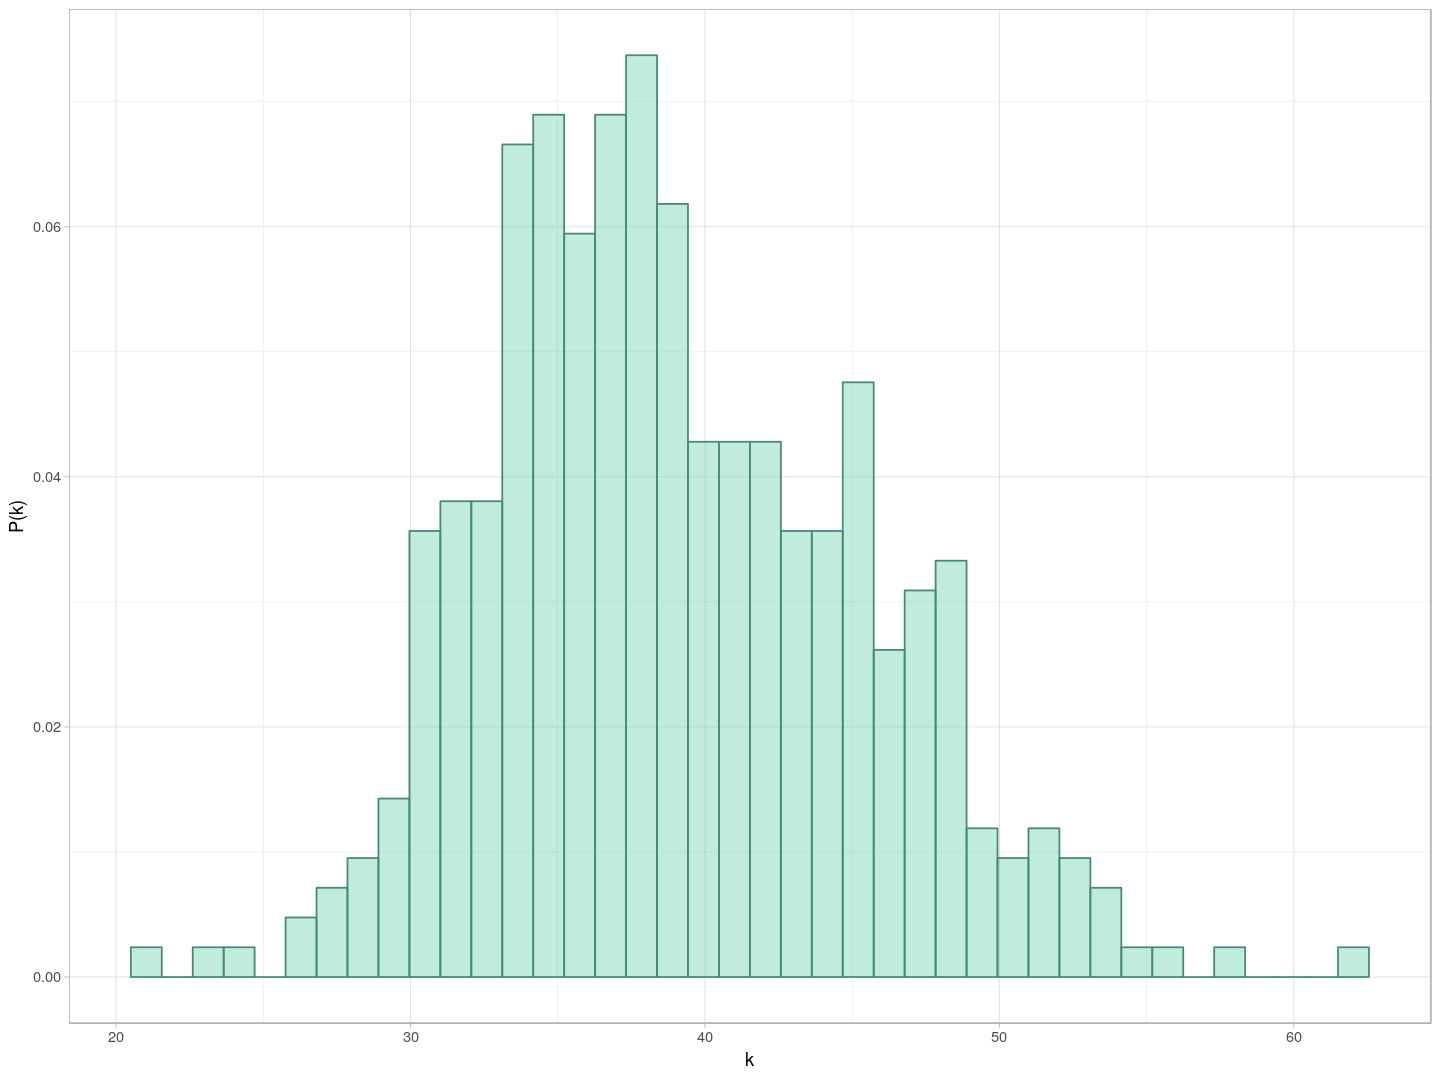

In [62]:
ggplot(data.frame("pk" = degree(er)), aes(pk)) + 
  geom_histogram(aes(y = ..density..), bins = 40, 
                 colour = "aquamarine4", fill = "aquamarine3", alpha = .4) +
  labs(x = "k", y = "P(k)") 

## Barabasi - Albert Model

In [63]:
ba <- barabasi.game(n = 400, power = 1.2, directed = F)

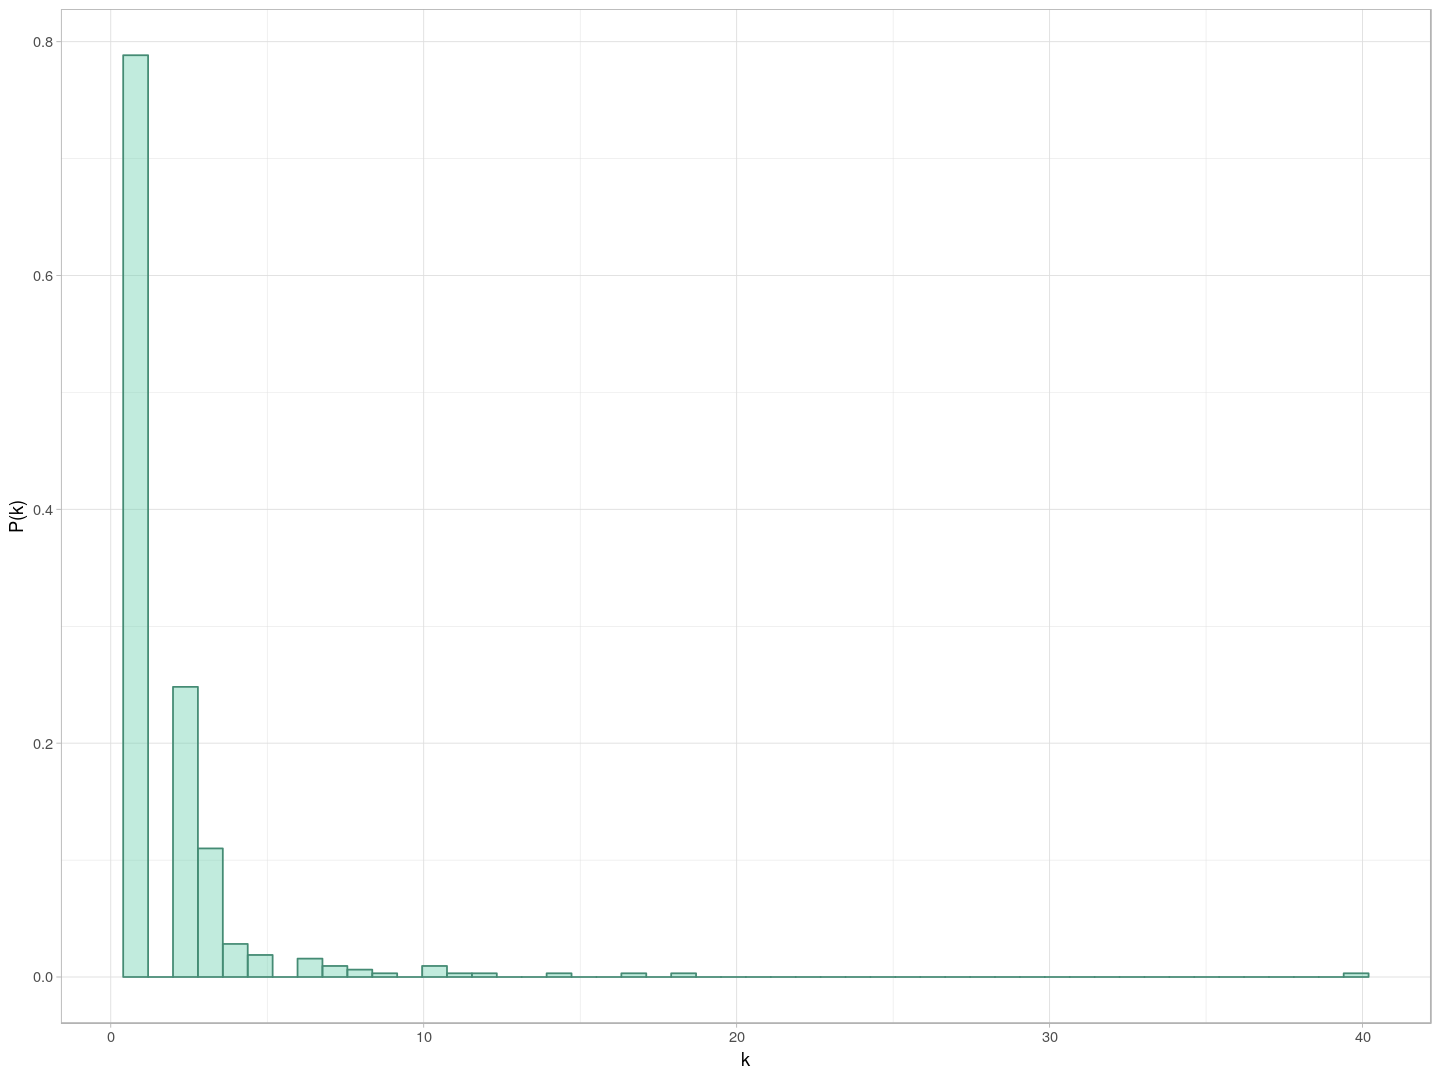

In [64]:
ggplot(data.frame("k" = degree(ba)), aes(k)) + 
  geom_histogram(aes(y = ..density..), bins = 50, 
                 colour = "aquamarine4", fill = "aquamarine3", alpha = .4) +
  labs(x = "k", y = "P(k)")

In [65]:
?barabasi.game

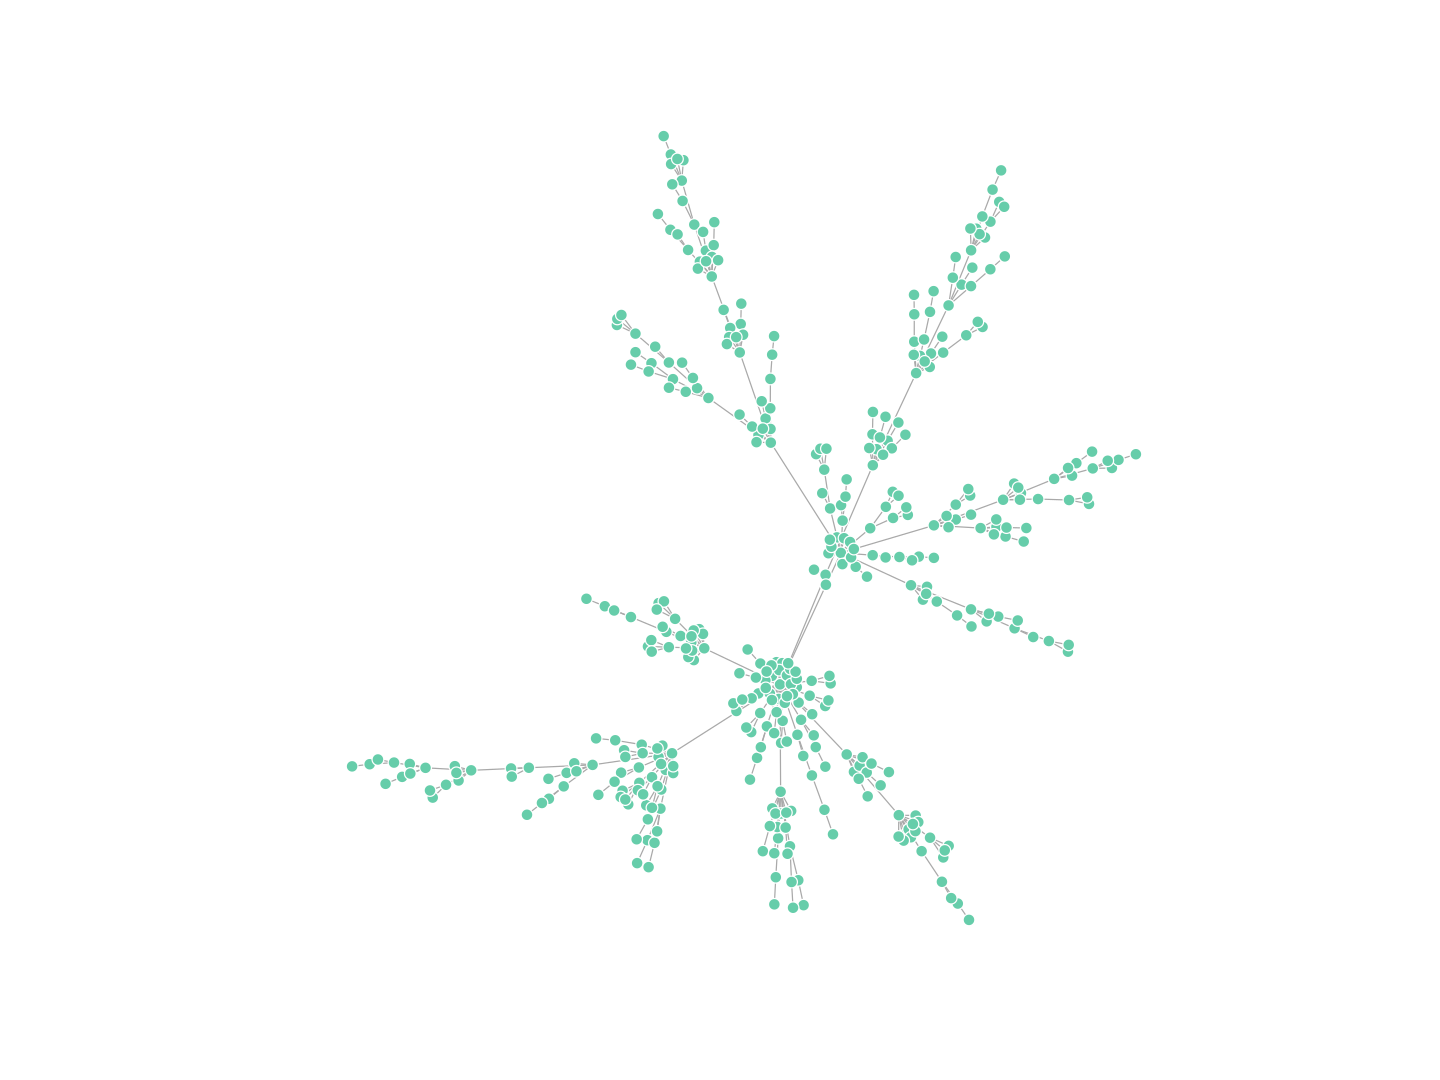

In [66]:
plot(ba, vertex.label = NA, vertex.size = 3)